**Исходные данные** (помесячно за 2 года + 1 месяц во время проведения теста)
- количество заказов
- выручка
- средний чек
- конверсия в покупку
- количество клиентов

**Что будет сделано**:
    Необходимо спроектировать АВ-тест, который сможет показать эластичность спроса по цене и принять решение о росте цен. 
    А именно:
- определить ключевые метрики теста
- определить принципы отбора территорий для теста
- описать способ определения периода проведения теста
- описать методы подведения итогов теста.
Обратите внимание, что 1 регион для теста уже выбран – это регион 1. Именно в этом регионе будут повышаться цены

  
<div class="alert alert-block alert-info" markdown=1>
<b><i><font size = 5> Содержание </font></i></b><a id = "content"></a>

<br><b>1. [Загрузка библиотек](#)</b>

<br><b> 2. [Загрузка датасета, первичная обработка данных, изменение датасета](#preprocess)</b>

<br><b> 3. [Добавление рассчитываемых показателей](#add_data)</b>
    
<br><b>4. [Графики и выводы. Выбор второго региона для теста](#graphs)</b>

<br><b>5. [Сезонность](#seasonality)</b>

<br><b>6. [АВ-тест](#abtest)</b>

</div>

<div class="alert alert-block alert-success">
<b><i><font size = 4>Загрузка библиотек</font></i></b>
</div>


In [1]:
import pandas as pd
import seaborn as sns
from operator import attrgetter
import numpy as np
import re

In [2]:
import scipy
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [3]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
import pprint

<div class="alert alert-block alert-info">
<b><i><font size = 4>Загрузка датасета, первичная обработка данных, изменение датасета</font></i></b>
</div>

<a id="preprocess"></a>

In [8]:
df = pd.read_excel('~/Данные для проектирования АВ-теста.xls')

In [9]:
df.sample(5)

,Показатели,Регионы,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,Месяц теста
4,"Выручка, тыс. руб.",Регион 1,6.415183e+06,6.753723e+06,6.783638e+06,6.843602e+06,7.171866e+06,7.054503e+06,6.893446e+06,6.926018e+06,...,7.157454e+06,7.182476e+06,7.205591e+06,7.232344e+06,7.266228e+06,7.289266e+06,7.307094e+06,7.318416e+06,7.337199e+06,8765098.0
14,"Средний чек, руб.",Регион 3,3.521820e+04,3.538617e+04,3.411067e+04,3.063654e+04,2.724095e+04,3.126464e+04,3.836972e+04,1.734017e+04,...,2.445429e+04,2.578251e+04,3.664067e+04,2.946735e+04,2.382014e+04,2.236052e+04,2.746937e+04,3.617133e+04,3.270610e+04,32823.0
1,Количество клиентов,Регион 2,9.965988e+04,1.120732e+05,1.269057e+05,1.409335e+05,1.538940e+05,1.529532e+05,1.623887e+05,1.411113e+05,...,3.343913e+05,3.171913e+05,3.130198e+05,3.161474e+05,3.653915e+05,4.053102e+05,3.782920e+05,3.281042e+05,3.520593e+05,365987.0
18,Конверсия в покупку,Регион 3,3.760243e+00,3.723012e+00,3.727675e+00,3.725344e+00,3.855894e+00,3.855894e+00,3.944482e+00,3.774300e+00,...,3.820000e+00,3.800000e+00,3.810000e+00,3.690000e+00,3.650000e+00,4.250000e+00,3.840000e+00,3.690000e+00,3.800000e+00,3.7
11,Количество заказов,Регион 4,1.517697e+06,1.705408e+06,1.921568e+06,2.028890e+06,2.224732e+06,1.895939e+06,1.546846e+06,2.354714e+06,...,2.056608e+06,1.959044e+06,1.582231e+06,2.097001e+06,2.277188e+06,2.449504e+06,2.236372e+06,1.904232e+06,2.177948e+06,2287640.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Показатели           20 non-null     object 
 1   Регионы              20 non-null     object 
 2   2019-06-01 00:00:00  20 non-null     float64
 3   2019-07-01 00:00:00  20 non-null     float64
 4   2019-08-01 00:00:00  20 non-null     float64
 5   2019-09-01 00:00:00  20 non-null     float64
 6   2019-10-01 00:00:00  20 non-null     float64
 7   2019-11-01 00:00:00  20 non-null     float64
 8   2019-12-01 00:00:00  20 non-null     float64
 9   2020-01-01 00:00:00  20 non-null     float64
 10  2020-02-01 00:00:00  20 non-null     float64
 11  2020-03-01 00:00:00  20 non-null     float64
 12  2020-04-01 00:00:00  20 non-null     float64
 13  2020-05-01 00:00:00  20 non-null     float64
 14  2020-06-01 00:00:00  20 non-null     float64
 15  2020-07-01 00:00:00  20 non-null     float

### <font color= black>Описание датасета </font>

В начальной версии датасета 28 колонок и 20 строк. <br>При этом даты - заголовки колонок. 
Данные в датасете имеют тип `object` - для стоковых данных, таких как названия регионов, названия показателей;
`float64` - для значений показателей. <br> Для анализа датасета я транспонирую датасет так, чтобы даты перешли из строки в колонку с датами; а также поменяю тип данных на `int` для показателей, которые должны быть целочисленными: Количество клиентов по регионам и Количество заказов.


In [11]:
data_X = df.drop('Месяц теста', axis = 1)

In [12]:
data = data_X.copy(deep = True)

In [13]:
data.index = data['Показатели']+'_'+data['Регионы']

In [14]:
data2 = data.drop(columns=['Показатели', 'Регионы']).T

In [15]:
data2[data2.columns[[0,1,2,3,8,9,10,11]]] = data2.iloc[:,[0,1,2,3,8,9,10,11]].astype(int)

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2019-06-01 00:00:00 to 2021-06-01 00:00:00
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Количество клиентов_Регион 1  25 non-null     int32  
 1   Количество клиентов_Регион 2  25 non-null     int32  
 2   Количество клиентов_Регион 3  25 non-null     int32  
 3   Количество клиентов_Регион 4  25 non-null     int32  
 4   Выручка, тыс. руб._Регион 1   25 non-null     float64
 5   Выручка, тыс. руб._Регион 2   25 non-null     float64
 6   Выручка, тыс. руб._Регион 3   25 non-null     float64
 7   Выручка, тыс. руб._Регион 4   25 non-null     float64
 8   Количество заказов_Регион 1   25 non-null     int32  
 9   Количество заказов_Регион 2   25 non-null     int32  
 10  Количество заказов_Регион 3   25 non-null     int32  
 11  Количество заказов_Регион 4   25 non-null     int32  
 12  Средний чек, руб._Регион 1    25 non

In [17]:
data2.reset_index(inplace=True) #3

In [18]:
data2.head()

,index,Количество клиентов_Регион 1,Количество клиентов_Регион 2,Количество клиентов_Регион 3,Количество клиентов_Регион 4,"Выручка, тыс. руб._Регион 1","Выручка, тыс. руб._Регион 2","Выручка, тыс. руб._Регион 3","Выручка, тыс. руб._Регион 4",Количество заказов_Регион 1,...,Количество заказов_Регион 3,Количество заказов_Регион 4,"Средний чек, руб._Регион 1","Средний чек, руб._Регион 2","Средний чек, руб._Регион 3","Средний чек, руб._Регион 4",Конверсия в покупку_Регион 1,Конверсия в покупку_Регион 2,Конверсия в покупку_Регион 3,Конверсия в покупку_Регион 4
0,2019-06-01,112666,99659,436973,250236,6.415183e+06,1.114571e+07,2.465858e+07,1.308874e+07,214567,...,700166,1517697,29898.274247,37618.194055,35218.198101,8624.078415,2.428913,2.835426,3.760243,7.205438
1,2019-07-01,126699,112073,491401,281405,6.753723e+06,1.173388e+07,2.595986e+07,1.377945e+07,283768,...,733616,1705408,23800.155789,36329.950109,35386.167087,8079.856455,2.404865,2.807353,3.723012,7.134097
2,2019-08-01,143468,126905,556437,318648,6.783638e+06,1.178586e+07,2.607485e+07,1.384049e+07,282514,...,764419,1921568,24011.688253,37767.440758,34110.673672,7202.705114,2.407877,2.810868,3.727675,7.143031
3,2019-09-01,159326,140933,617944,353871,6.843602e+06,1.189004e+07,2.630533e+07,1.396283e+07,297650,...,858626,2028890,22992.109861,37657.331279,30636.544316,6882.004199,2.406371,2.809111,3.725344,7.138564
4,2019-10-01,157465,153894,579099,472861,7.171866e+06,1.182930e+07,2.667140e+07,1.407084e+07,342831,...,979092,2224732,20919.536886,30828.577814,27240.953863,6324.735519,2.490699,2.907552,3.855894,7.388727


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         25 non-null     datetime64[ns]
 1   Количество клиентов_Регион 1  25 non-null     int32         
 2   Количество клиентов_Регион 2  25 non-null     int32         
 3   Количество клиентов_Регион 3  25 non-null     int32         
 4   Количество клиентов_Регион 4  25 non-null     int32         
 5   Выручка, тыс. руб._Регион 1   25 non-null     float64       
 6   Выручка, тыс. руб._Регион 2   25 non-null     float64       
 7   Выручка, тыс. руб._Регион 3   25 non-null     float64       
 8   Выручка, тыс. руб._Регион 4   25 non-null     float64       
 9   Количество заказов_Регион 1   25 non-null     int32         
 10  Количество заказов_Регион 2   25 non-null     int32         
 11  Количество заказов_Регион 3   25 n

In [19]:
data2 = data2.rename(columns = {"index":"date"})

In [20]:
data2.sample(5)

,date,Количество клиентов_Регион 1,Количество клиентов_Регион 2,Количество клиентов_Регион 3,Количество клиентов_Регион 4,"Выручка, тыс. руб._Регион 1","Выручка, тыс. руб._Регион 2","Выручка, тыс. руб._Регион 3","Выручка, тыс. руб._Регион 4",Количество заказов_Регион 1,...,Количество заказов_Регион 3,Количество заказов_Регион 4,"Средний чек, руб._Регион 1","Средний чек, руб._Регион 2","Средний чек, руб._Регион 3","Средний чек, руб._Регион 4",Конверсия в покупку_Регион 1,Конверсия в покупку_Регион 2,Конверсия в покупку_Регион 3,Конверсия в покупку_Регион 4
8,2020-02-01,145696,151846,543104,288984,6.962541e+06,1.192134e+07,2.784603e+07,1.455177e+07,329821,...,1531006,2431805,21110.058688,37352.821252,18188.061096,5983.937309,2.437994,2.846026,3.774300,7.232375
7,2020-01-01,143002,141111,498440,295474,6.926018e+06,1.171233e+07,2.750588e+07,1.441422e+07,354664,...,1586252,2354714,19528.392131,35827.944918,17340.169784,6121.430741,2.437994,2.846026,3.774300,7.232375
11,2020-05-01,107064,133558,398229,164920,7.028678e+06,1.237351e+07,2.866586e+07,1.489090e+07,205716,...,1264046,1534577,34166.899214,60044.868344,22677.860284,9703.587862,2.413900,2.817900,3.737000,7.160900
3,2019-09-01,159326,140933,617944,353871,6.843602e+06,1.189004e+07,2.630533e+07,1.396283e+07,297650,...,858626,2028890,22992.109861,37657.331279,30636.544316,6882.004199,2.406371,2.809111,3.725344,7.138564
9,2020-03-01,148295,148303,522541,245042,6.985738e+06,1.209716e+07,2.821687e+07,1.469387e+07,274424,...,1288718,2048550,25456.001905,43424.825452,21895.299929,7172.815894,2.693991,3.144868,4.170613,7.991797


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          25 non-null     datetime64[ns]
 1   Количество клиентов_Регион 1  25 non-null     int32         
 2   Количество клиентов_Регион 2  25 non-null     int32         
 3   Количество клиентов_Регион 3  25 non-null     int32         
 4   Количество клиентов_Регион 4  25 non-null     int32         
 5   Выручка, тыс. руб._Регион 1   25 non-null     float64       
 6   Выручка, тыс. руб._Регион 2   25 non-null     float64       
 7   Выручка, тыс. руб._Регион 3   25 non-null     float64       
 8   Выручка, тыс. руб._Регион 4   25 non-null     float64       
 9   Количество заказов_Регион 1   25 non-null     int32         
 10  Количество заказов_Регион 2   25 non-null     int32         
 11  Количество заказов_Регион 3   25 n

### **Описание датасета**

В транспонированном датасете 21 колонока и 25 строк. <br>При этом даты - заголовки колонок. 
Данные в датасете имеют тип `int32` - для целочисленных значений показателей Количество клиентов по регионам и Количества заказов по регионам; `datetime64` - для дат (менять их тип не пришлось, они изначально были представлены в нужном формате); `float64`- для остальных показателей.  
<br> Также из датасета убрали данные Месяца теста. Это сделано для анализа показателей без влияния изменений, внесеннных при тестировании. Позже данные Месяца теста будут использованы для сравнения показателей и выводов о результатах теста.



<div class="alert alert-block alert-info">
<b><i><font size = 4>Добавим рассчитываемые показатели в датасет, а именно из предоставленной информации можно вывести:</font></i></b> <i>ARPU MAU, ARPPU MAU, Заказов на Клиента, Кол-во платящих клиентов (=Покупатели), Заказов на Покупателя</i>
</div>

<a id = "add_data"></a>




<br> [*Back to content*](#content) 

In [21]:
data2.insert(21, column = "ARPU MAU_Регион 1 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 1'])/data2['Количество клиентов_Регион 1'],3))  
data2.insert(22, column = "ARPU MAU_Регион 2 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 2'])/data2['Количество клиентов_Регион 2'],3))    
data2.insert(23, column = "ARPU MAU_Регион 3 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 3'])/data2['Количество клиентов_Регион 3'],3)) 
data2.insert(24, column = "ARPU MAU_Регион 4 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 4'])/data2['Количество клиентов_Регион 4'],3))  

In [22]:
data2.insert(25, column = "ARPPU MAU_Регион 1 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 1'])/(data2['Количество клиентов_Регион 1']*data2['Конверсия в покупку_Регион 1']/100),3))  
data2.insert(26, column = "ARPPU MAU_Регион 2 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 2'])/(data2['Количество клиентов_Регион 2']*data2['Конверсия в покупку_Регион 2']/100),3))   
data2.insert(27, column = "ARPPU MAU_Регион 3 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 3'])/(data2['Количество клиентов_Регион 3']*data2['Конверсия в покупку_Регион 3']/100),3))
data2.insert(28, column = "ARPPU MAU_Регион 4 (тыс.руб/мес)", 
                           value = round((data2['Выручка, тыс. руб._Регион 4'])/(data2['Количество клиентов_Регион 4']*data2['Конверсия в покупку_Регион 4']/100),3)) 

>_"Заказов на Клиента", "Покупатели", "Заказов на Покупателя" - рассчитанные показатели, они не импортировны из базы данных, а посчитаны на основании имеющихся показателей. По этой причине оставила эти рассчеты в типе float64_

In [23]:
data2.insert(29, column = "Заказов на Клиента_Регион 1", 
                           value = round((data2['Количество заказов_Регион 1'])/data2['Количество клиентов_Регион 1'],2)) 
data2.insert(30, column = "Заказов на Клиента_Регион 2", 
                           value = round((data2['Количество заказов_Регион 2'])/data2['Количество клиентов_Регион 2'],2))   
data2.insert(31, column = "Заказов на Клиента_Регион 3", 
                           value = round((data2['Количество заказов_Регион 3'])/data2['Количество клиентов_Регион 3'],2)) 
data2.insert(32, column = "Заказов на Клиента_Регион 4", 
                           value = round((data2['Количество заказов_Регион 4'])/data2['Количество клиентов_Регион 4'],2))

In [24]:
data2.insert(33, column = "Покупатели_Регион 1", 
                           value = round((data2['Количество клиентов_Регион 1']*data2['Конверсия в покупку_Регион 1']/100),0))  
data2.insert(34, column = "Покупатели_Регион 2", 
                           value = round((data2['Количество клиентов_Регион 2']*data2['Конверсия в покупку_Регион 2']/100),0))   
data2.insert(35, column = "Покупатели_Регион 3", 
                           value = round((data2['Количество клиентов_Регион 3']*data2['Конверсия в покупку_Регион 3']/100),0))
data2.insert(36, column = "Покупатели_Регион 4", 
                           value = round((data2['Количество клиентов_Регион 4']*data2['Конверсия в покупку_Регион 4']/100),0))

In [25]:
data2.insert(37, column = "Заказов на Покупатели_Регион 1", 
                           value = round((data2['Количество заказов_Регион 1']/data2['Покупатели_Регион 1']),2))  
data2.insert(38, column = "Заказов на Покупатели_Регион 2", 
                           value = round((data2['Количество заказов_Регион 2']/data2['Покупатели_Регион 2']),2))   
data2.insert(39, column = "Заказов на Покупатели_Регион 3", 
                           value = round((data2['Количество заказов_Регион 3']/data2['Покупатели_Регион 3']),2))
data2.insert(40, column = "Заказов на Покупатели_Регион 4", 
                           value = round((data2['Количество заказов_Регион 4']/data2['Покупатели_Регион 4']),2))

In [26]:
data2.head()

,date,Количество клиентов_Регион 1,Количество клиентов_Регион 2,Количество клиентов_Регион 3,Количество клиентов_Регион 4,"Выручка, тыс. руб._Регион 1","Выручка, тыс. руб._Регион 2","Выручка, тыс. руб._Регион 3","Выручка, тыс. руб._Регион 4",Количество заказов_Регион 1,...,Заказов на Клиента_Регион 3,Заказов на Клиента_Регион 4,Покупатели_Регион 1,Покупатели_Регион 2,Покупатели_Регион 3,Покупатели_Регион 4,Заказов на Покупатели_Регион 1,Заказов на Покупатели_Регион 2,Заказов на Покупатели_Регион 3,Заказов на Покупатели_Регион 4
0,2019-06-01,112666,99659,436973,250236,6.415183e+06,1.114571e+07,2.465858e+07,1.308874e+07,214567,...,1.60,6.07,2737.0,2826.0,16431.0,18031.0,78.39,104.84,42.61,84.17
1,2019-07-01,126699,112073,491401,281405,6.753723e+06,1.173388e+07,2.595986e+07,1.377945e+07,283768,...,1.49,6.06,3047.0,3146.0,18295.0,20076.0,93.13,102.66,40.10,84.95
2,2019-08-01,143468,126905,556437,318648,6.783638e+06,1.178586e+07,2.607485e+07,1.384049e+07,282514,...,1.37,6.03,3455.0,3567.0,20742.0,22761.0,81.77,87.49,36.85,84.42
3,2019-09-01,159326,140933,617944,353871,6.843602e+06,1.189004e+07,2.630533e+07,1.396283e+07,297650,...,1.39,5.73,3834.0,3959.0,23021.0,25261.0,77.63,79.75,37.30,80.32
4,2019-10-01,157465,153894,579099,472861,7.171866e+06,1.182930e+07,2.667140e+07,1.407084e+07,342831,...,1.69,4.70,3922.0,4475.0,22329.0,34938.0,87.41,85.75,43.85,63.68


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              25 non-null     datetime64[ns]
 1   Количество клиентов_Регион 1      25 non-null     int32         
 2   Количество клиентов_Регион 2      25 non-null     int32         
 3   Количество клиентов_Регион 3      25 non-null     int32         
 4   Количество клиентов_Регион 4      25 non-null     int32         
 5   Выручка, тыс. руб._Регион 1       25 non-null     float64       
 6   Выручка, тыс. руб._Регион 2       25 non-null     float64       
 7   Выручка, тыс. руб._Регион 3       25 non-null     float64       
 8   Выручка, тыс. руб._Регион 4       25 non-null     float64       
 9   Количество заказов_Регион 1       25 non-null     int32         
 10  Количество заказов_Регион 2       25 non-null     in

<div class="alert alert-block alert-info">
<b><i><font size = 4>Графики и выводы. Выбор второго региона для теста</font></i></b> 
</div>

<a id = "graphs"></a>




<br> [*Back to content*](#content) 

>Для построния диаграмм по распределению признаков создадим список колонок с числовыми значениями

In [28]:
num_cols = []
dt_cols = []

cols_and_type = data2.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('float64','int32'):
        num_cols.append(col)
    else: 
        dt_cols.append(col)
        
print(num_cols, '\n\n', dt_cols)
cols_and_type

['Количество клиентов_Регион 1', 'Количество клиентов_Регион 2', 'Количество клиентов_Регион 3', 'Количество клиентов_Регион 4', 'Выручка, тыс. руб._Регион 1', 'Выручка, тыс. руб._Регион 2', 'Выручка, тыс. руб._Регион 3', 'Выручка, тыс. руб._Регион 4', 'Количество заказов_Регион 1', 'Количество заказов_Регион 2', 'Количество заказов_Регион 3', 'Количество заказов_Регион 4', 'Средний чек, руб._Регион 1', 'Средний чек, руб._Регион 2', 'Средний чек, руб._Регион 3', 'Средний чек, руб._Регион 4', 'Конверсия в покупку_Регион 1', 'Конверсия в покупку_Регион 2', 'Конверсия в покупку_Регион 3', 'Конверсия в покупку_Регион 4', 'ARPU MAU_Регион 1 (тыс.руб/мес)', 'ARPU MAU_Регион 2 (тыс.руб/мес)', 'ARPU MAU_Регион 3 (тыс.руб/мес)', 'ARPU MAU_Регион 4 (тыс.руб/мес)', 'ARPPU MAU_Регион 1 (тыс.руб/мес)', 'ARPPU MAU_Регион 2 (тыс.руб/мес)', 'ARPPU MAU_Регион 3 (тыс.руб/мес)', 'ARPPU MAU_Регион 4 (тыс.руб/мес)', 'Заказов на Клиента_Регион 1', 'Заказов на Клиента_Регион 2', 'Заказов на Клиента_Регион 3'

{'date': dtype('<M8[ns]'),
 'Количество клиентов_Регион 1': dtype('int32'),
 'Количество клиентов_Регион 2': dtype('int32'),
 'Количество клиентов_Регион 3': dtype('int32'),
 'Количество клиентов_Регион 4': dtype('int32'),
 'Выручка, тыс. руб._Регион 1': dtype('float64'),
 'Выручка, тыс. руб._Регион 2': dtype('float64'),
 'Выручка, тыс. руб._Регион 3': dtype('float64'),
 'Выручка, тыс. руб._Регион 4': dtype('float64'),
 'Количество заказов_Регион 1': dtype('int32'),
 'Количество заказов_Регион 2': dtype('int32'),
 'Количество заказов_Регион 3': dtype('int32'),
 'Количество заказов_Регион 4': dtype('int32'),
 'Средний чек, руб._Регион 1': dtype('float64'),
 'Средний чек, руб._Регион 2': dtype('float64'),
 'Средний чек, руб._Регион 3': dtype('float64'),
 'Средний чек, руб._Регион 4': dtype('float64'),
 'Конверсия в покупку_Регион 1': dtype('float64'),
 'Конверсия в покупку_Регион 2': dtype('float64'),
 'Конверсия в покупку_Регион 3': dtype('float64'),
 'Конверсия в покупку_Регион 4': dty

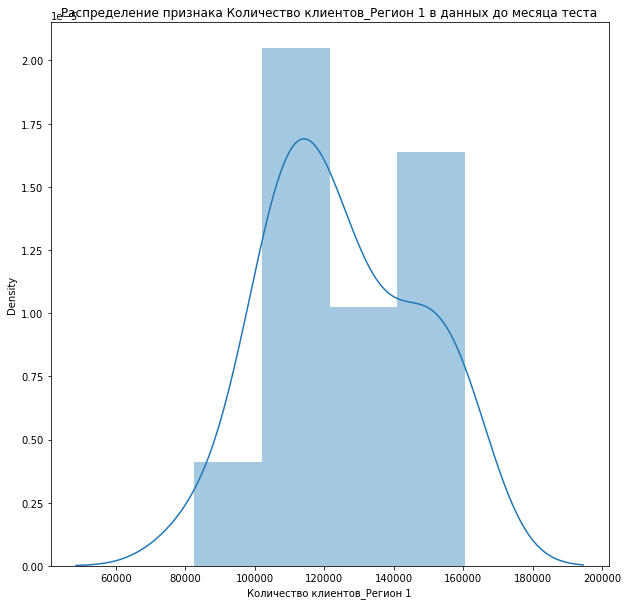

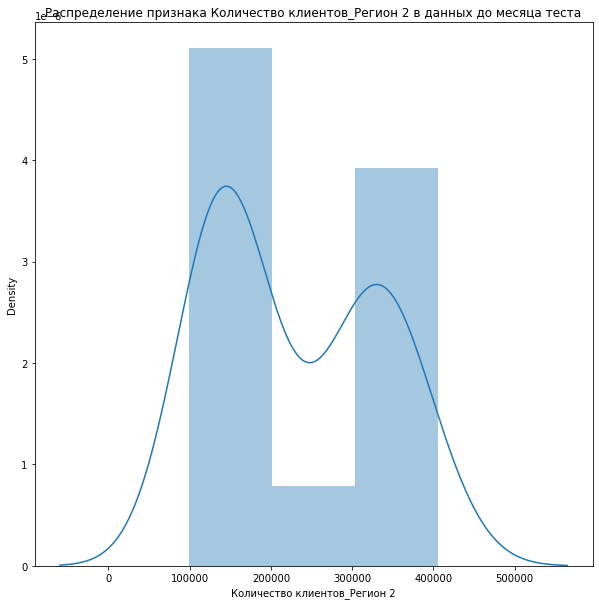

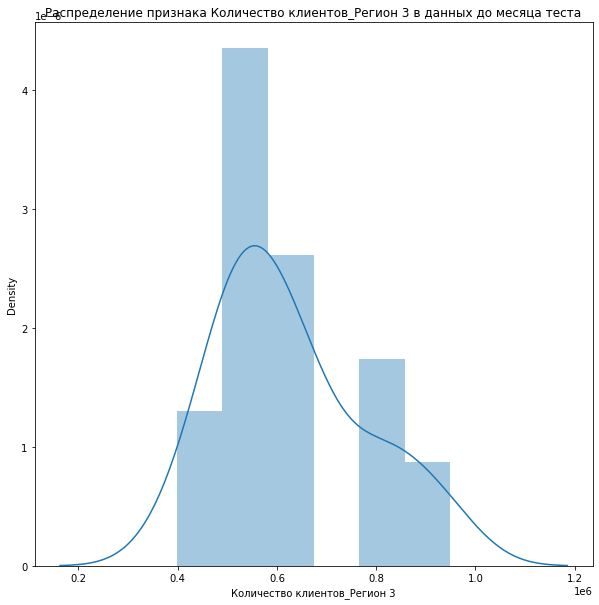

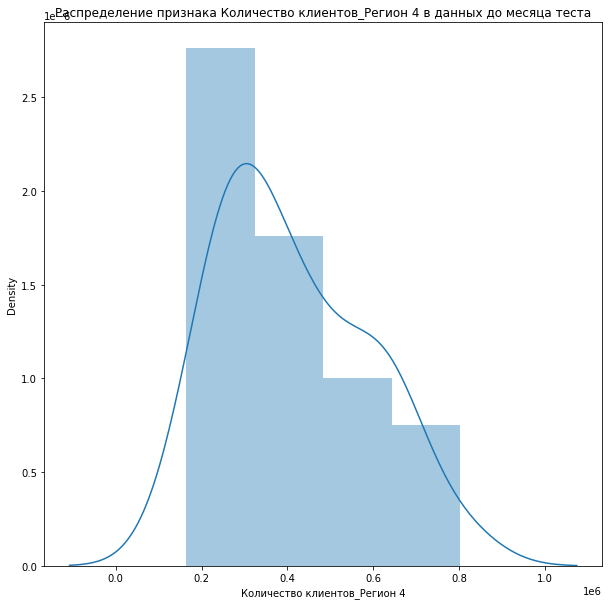

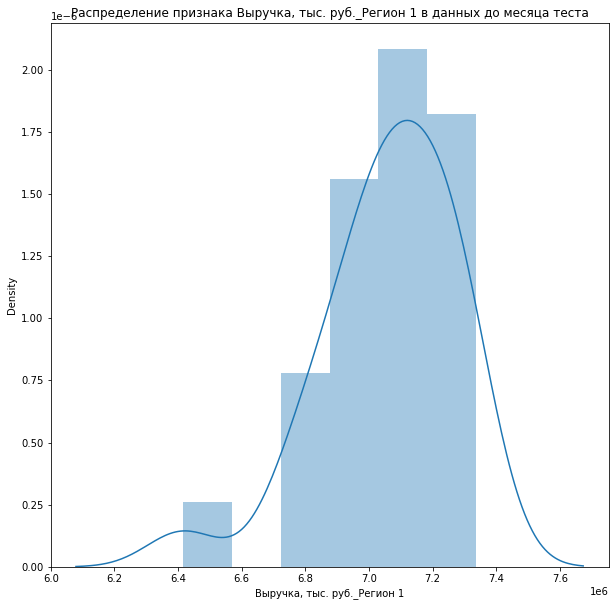

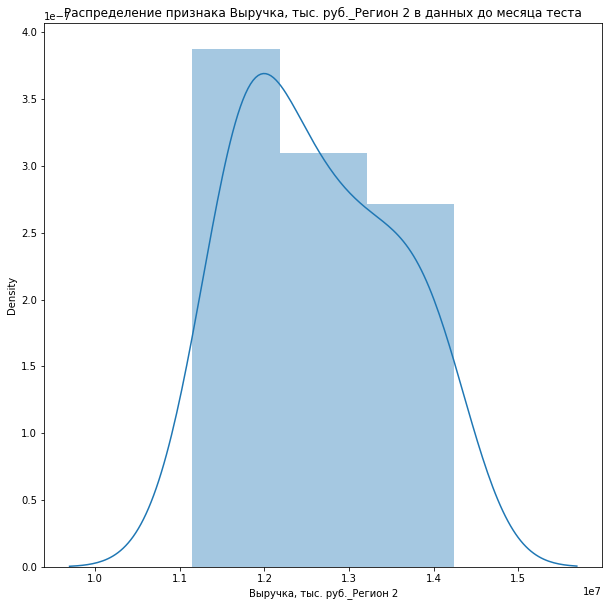

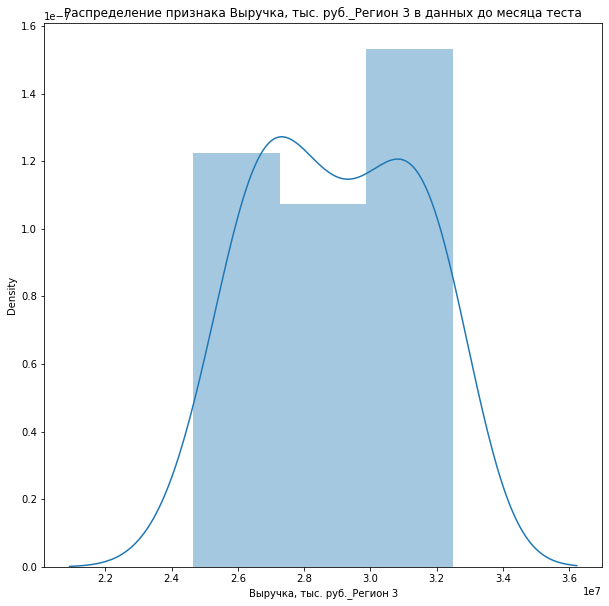

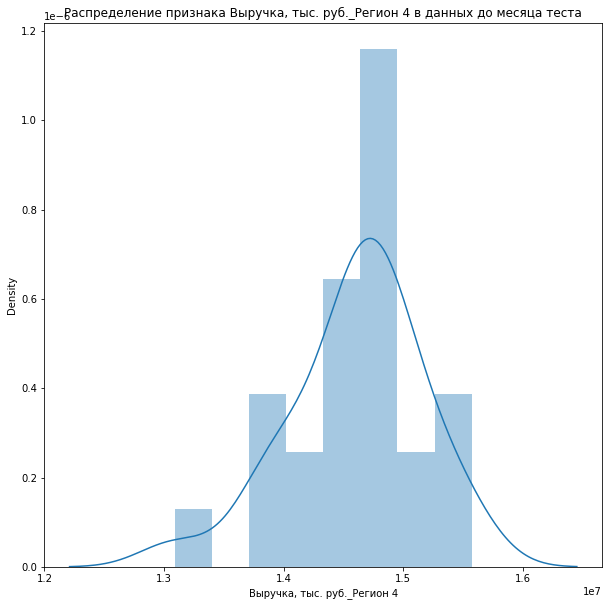

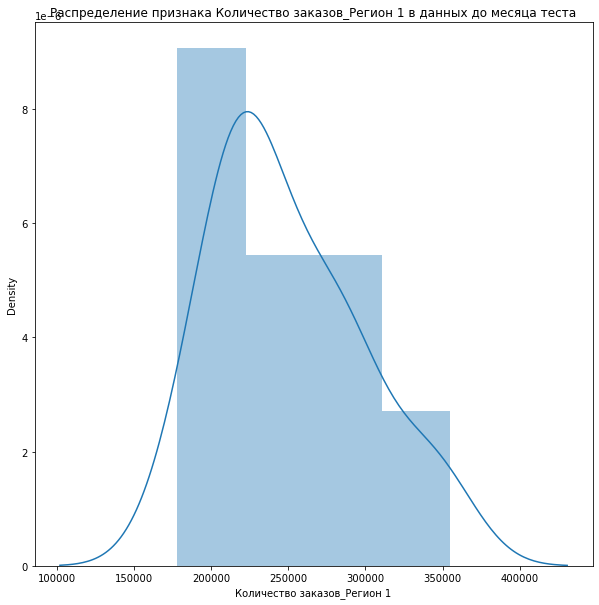

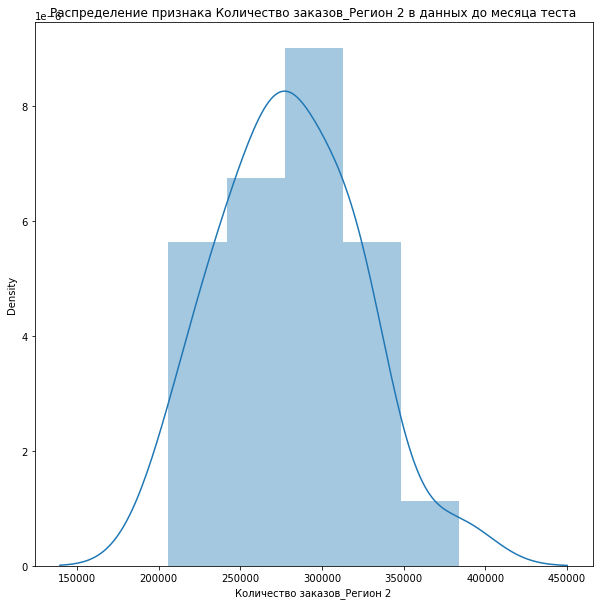

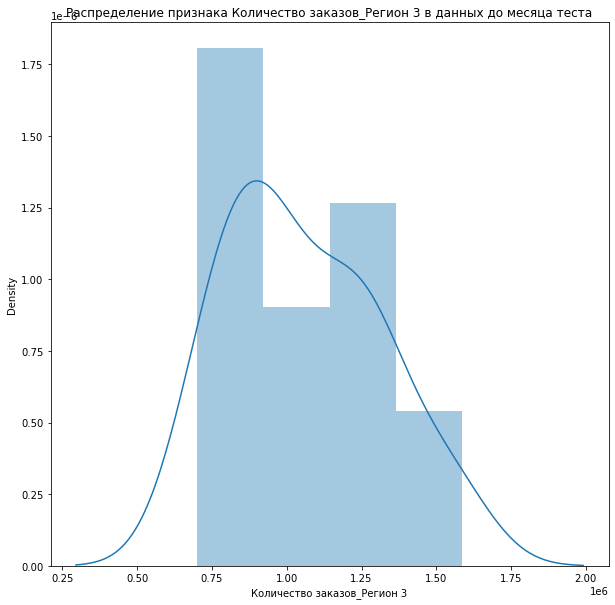

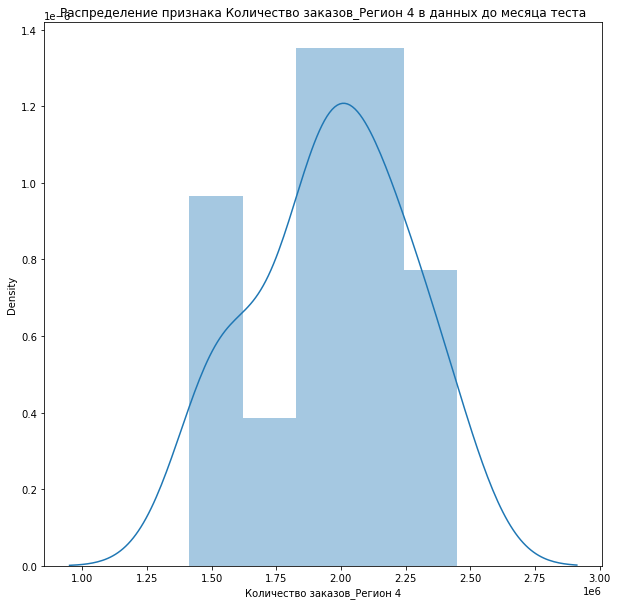

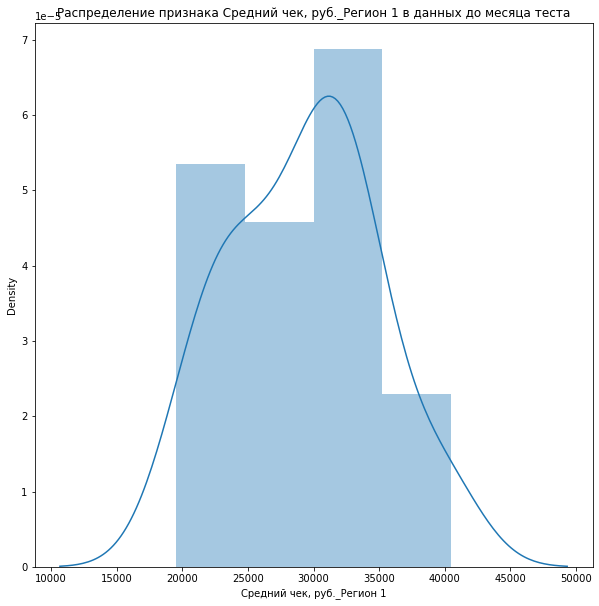

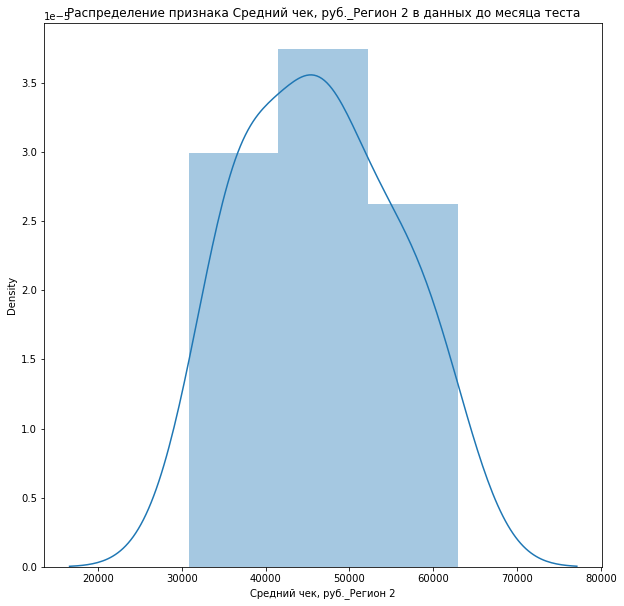

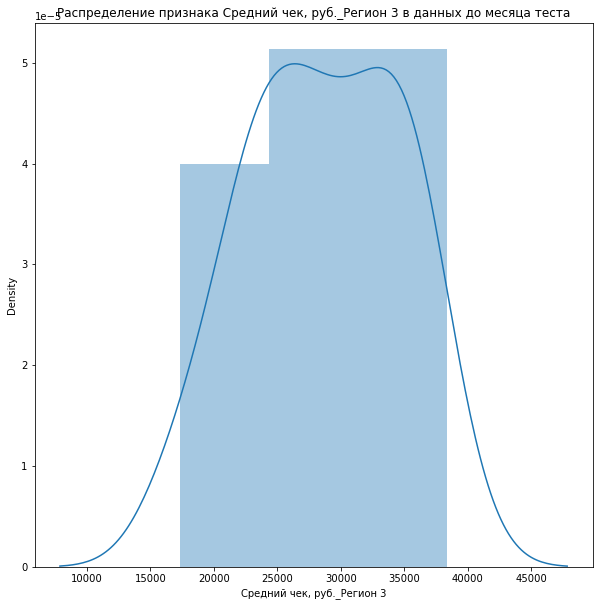

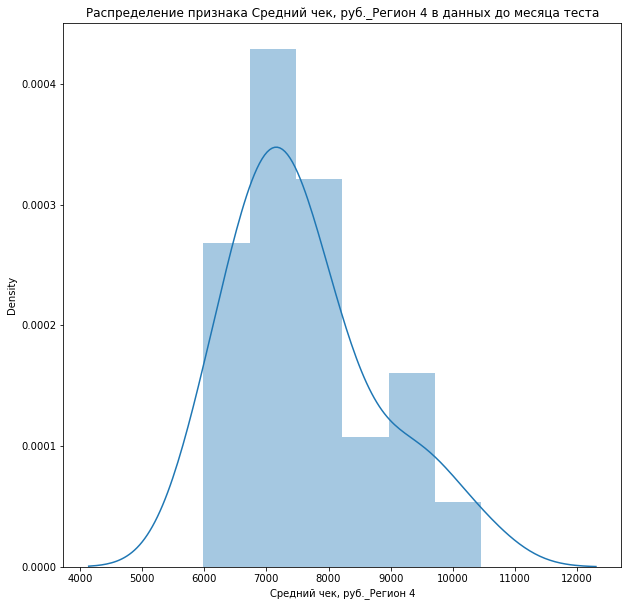

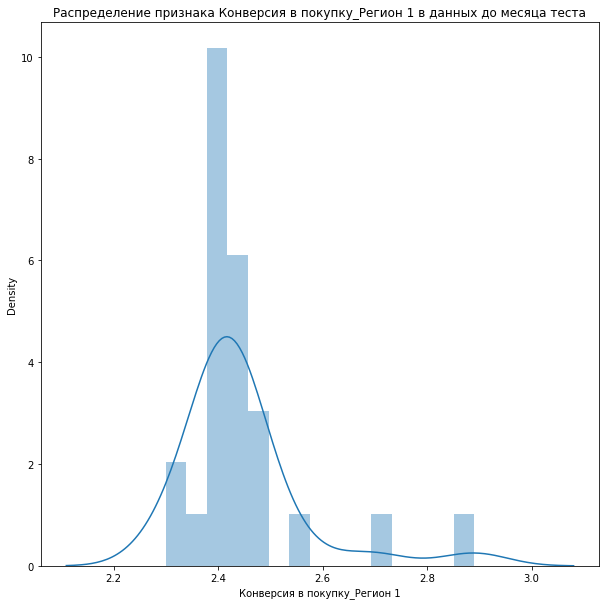

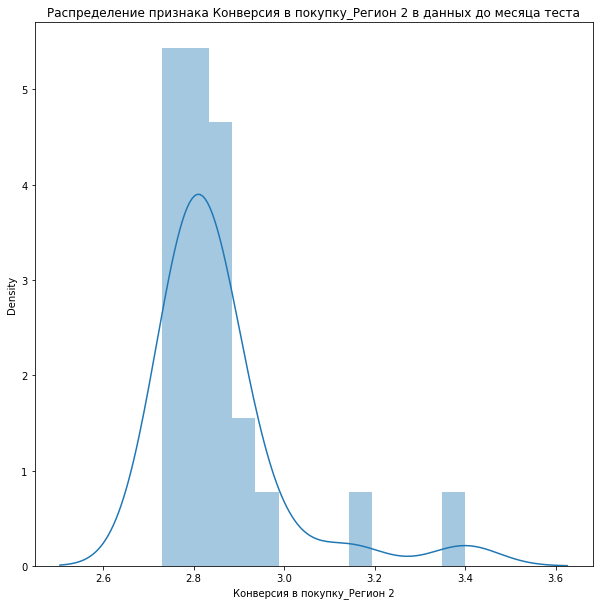

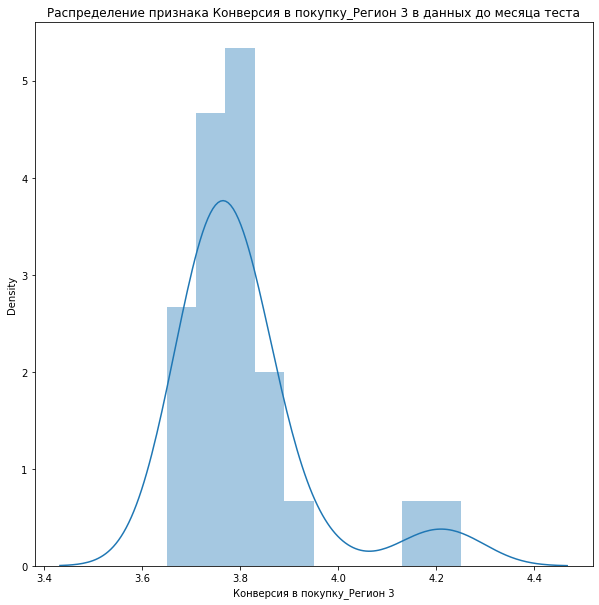

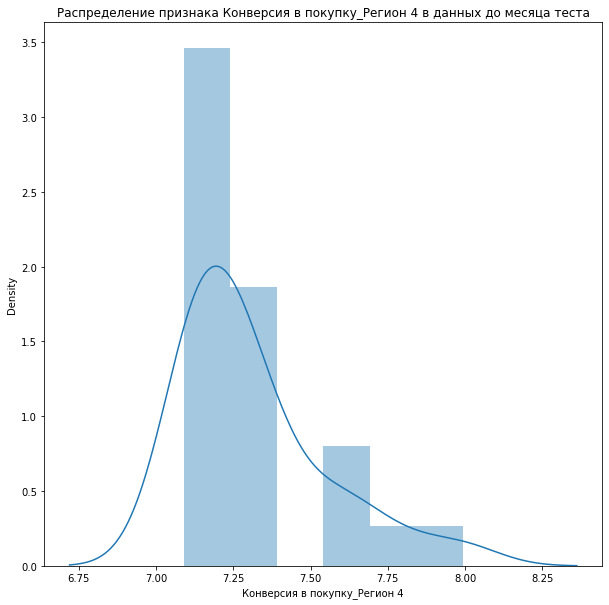

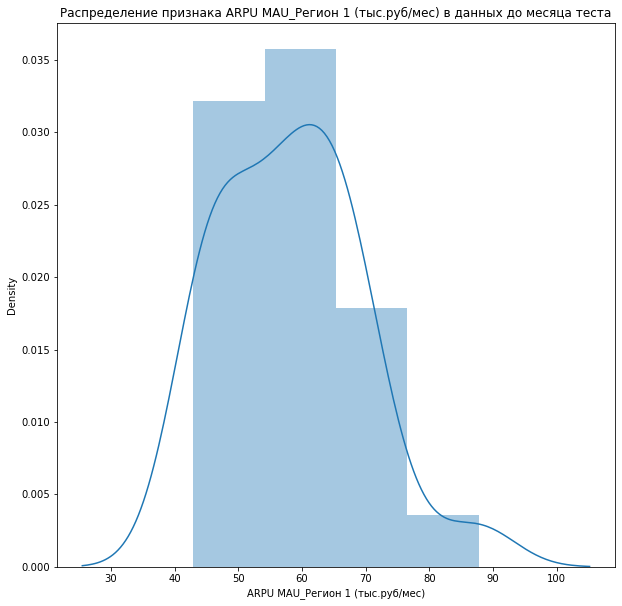

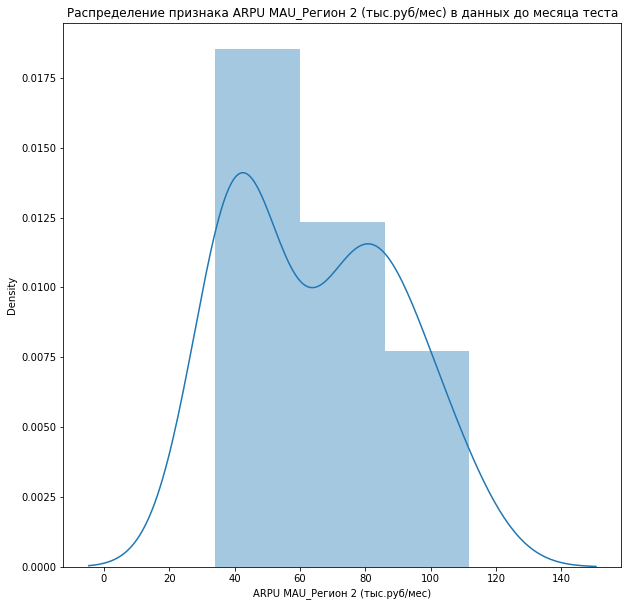

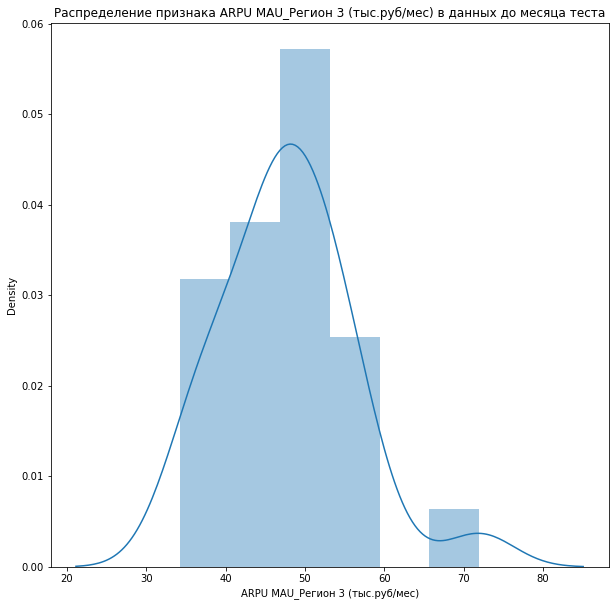

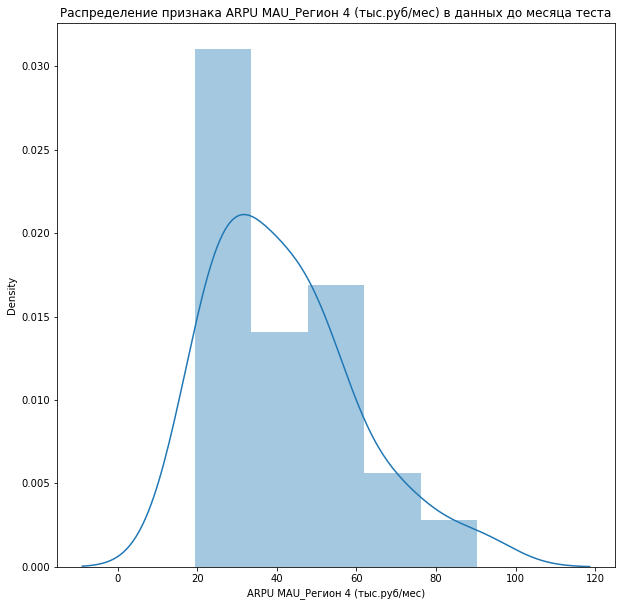

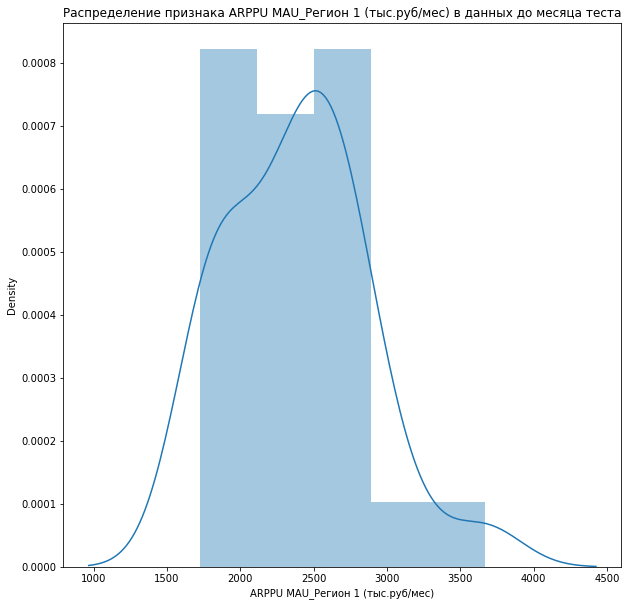

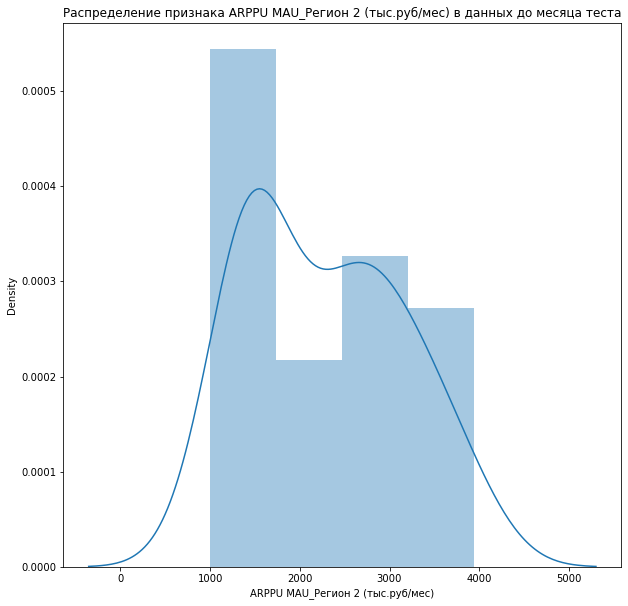

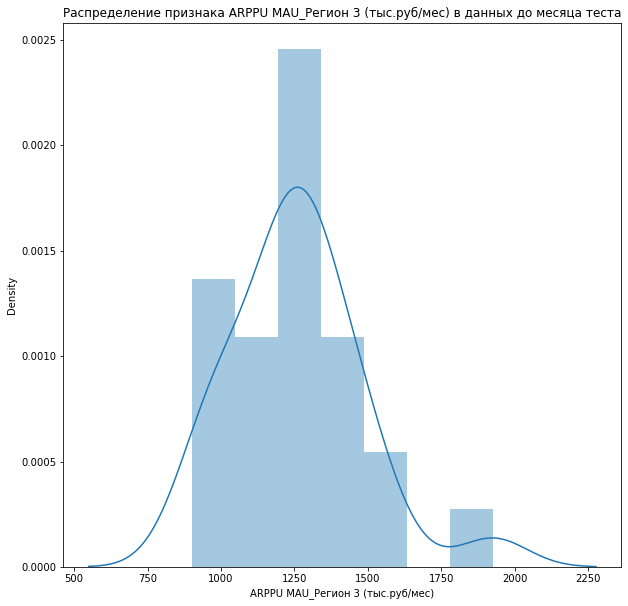

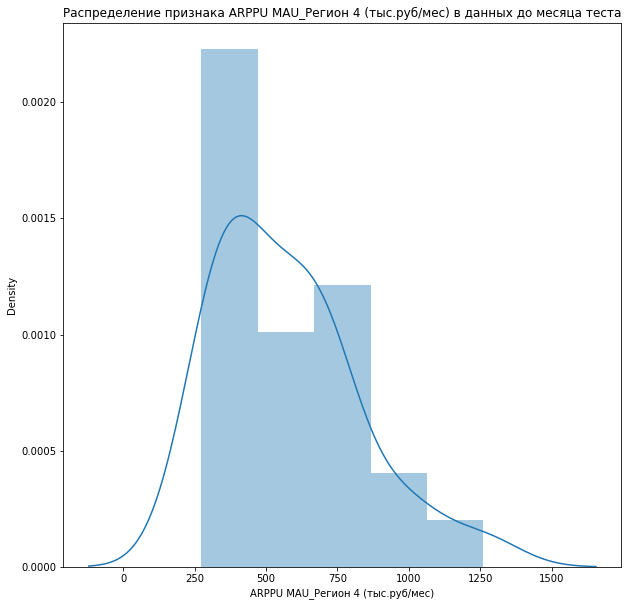

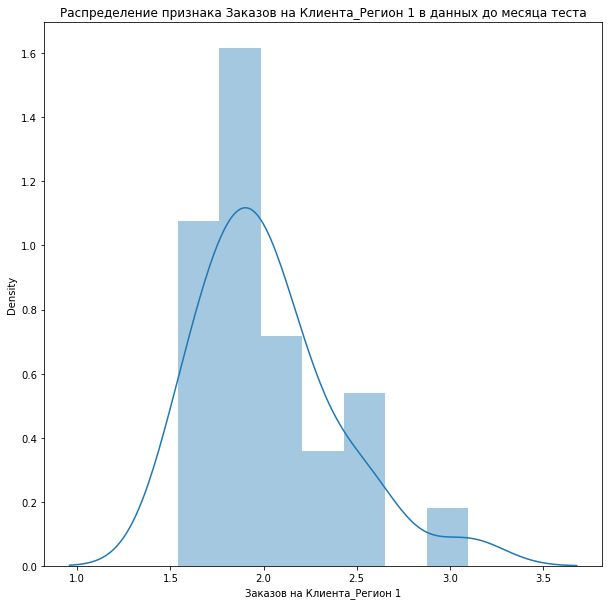

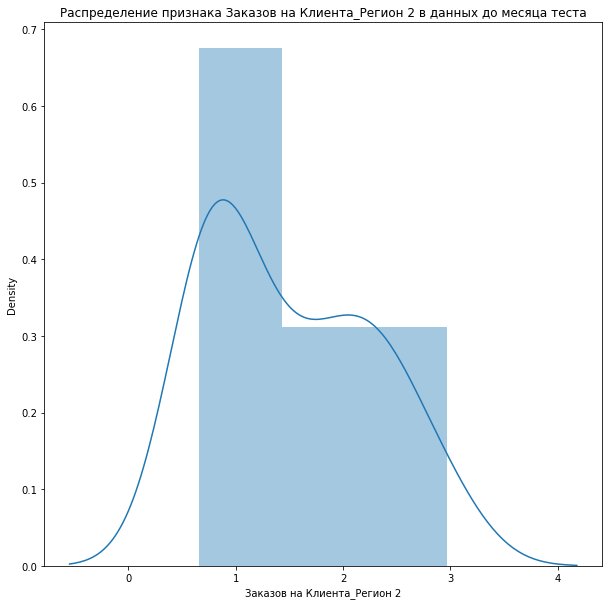

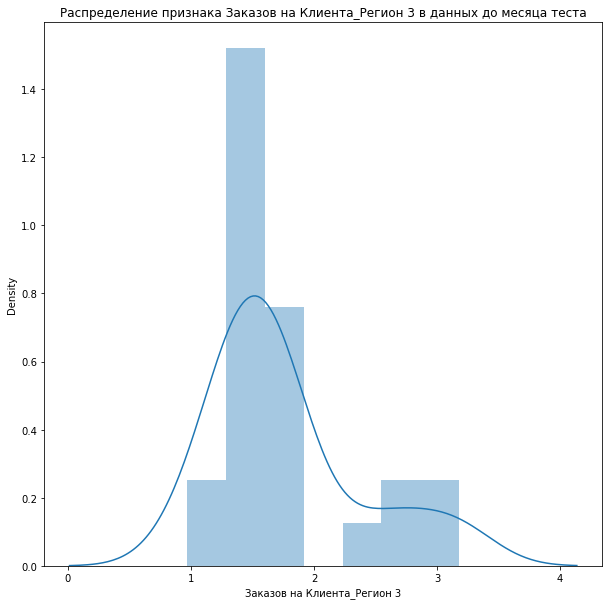

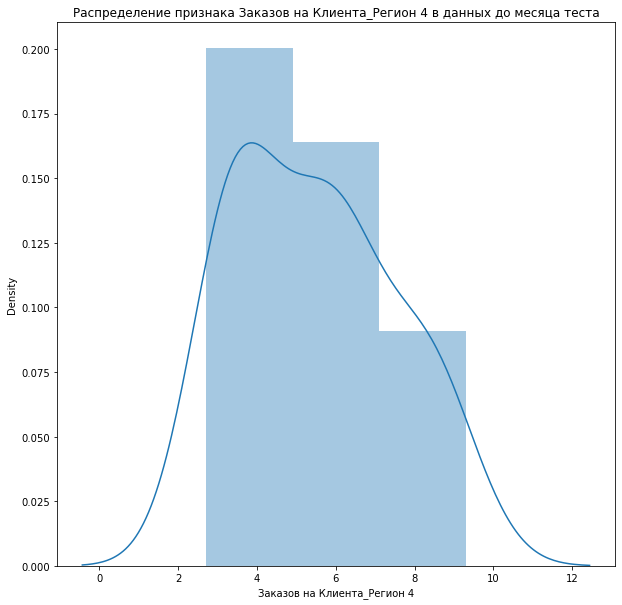

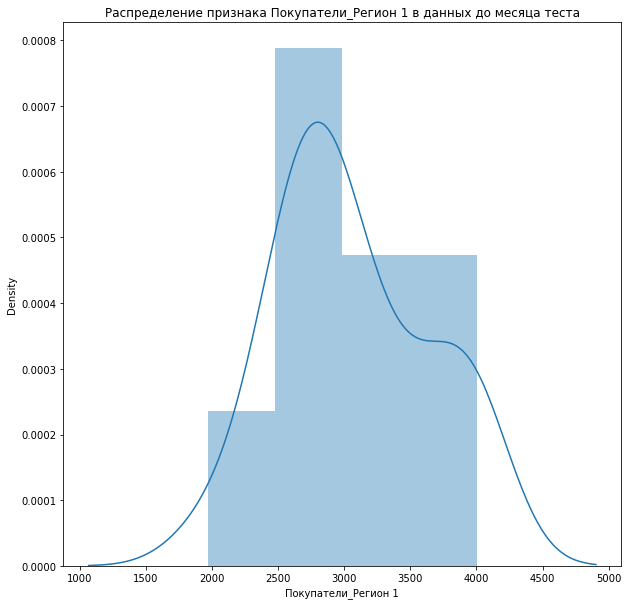

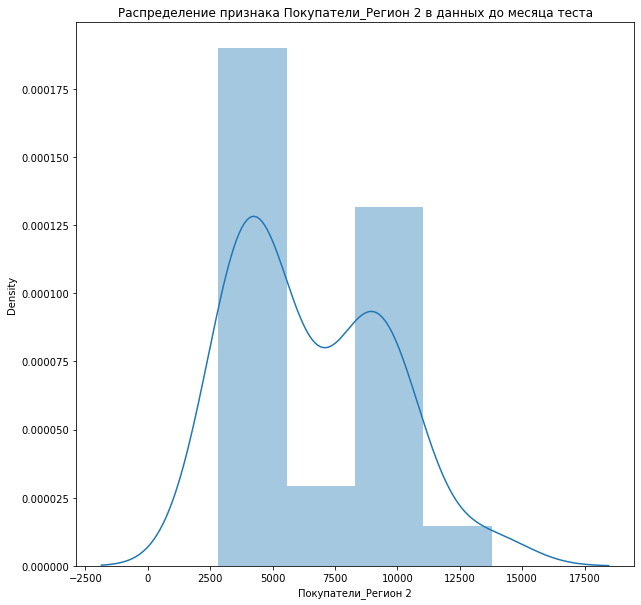

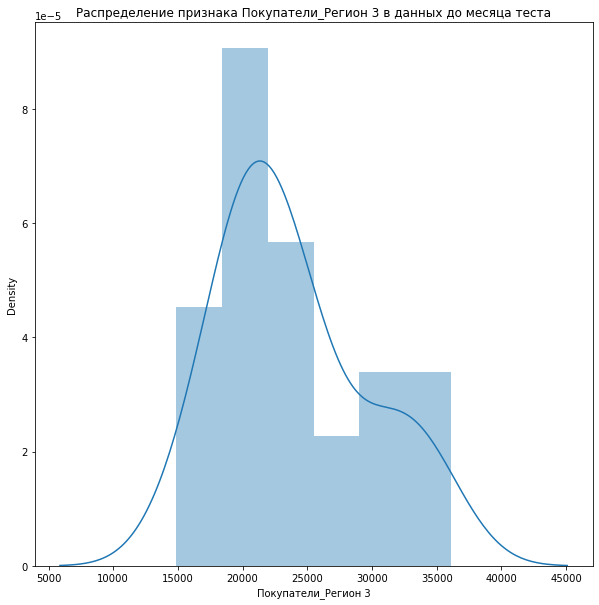

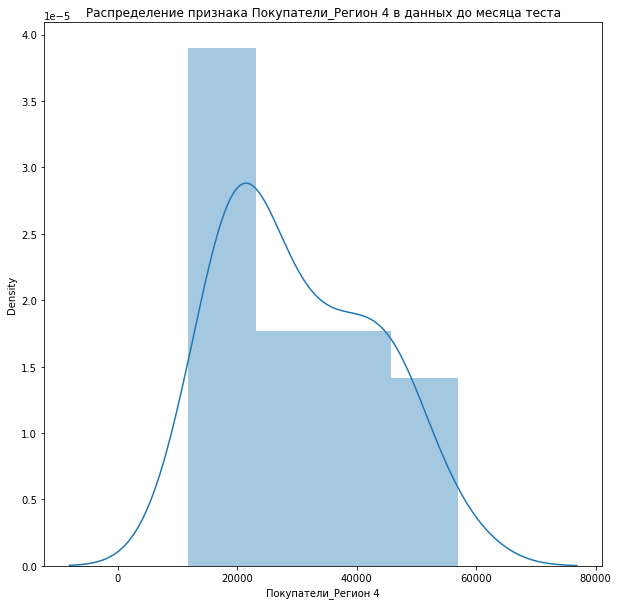

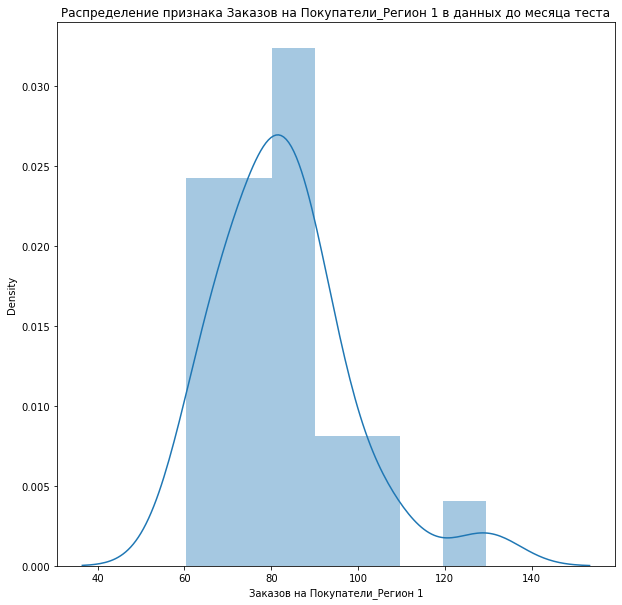

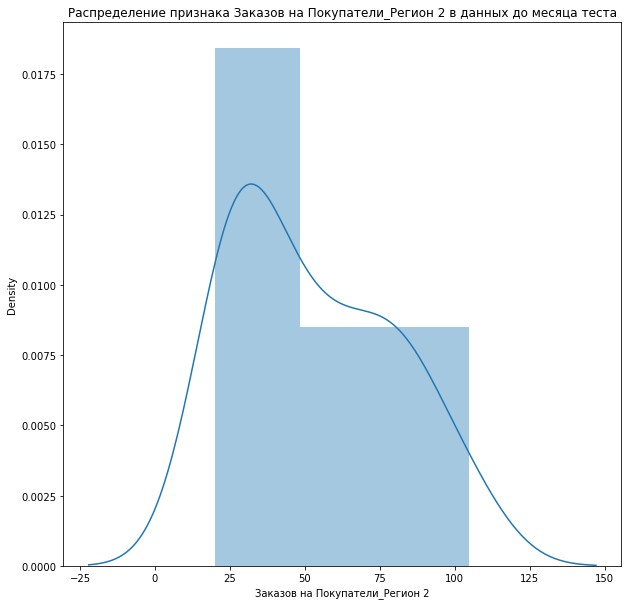

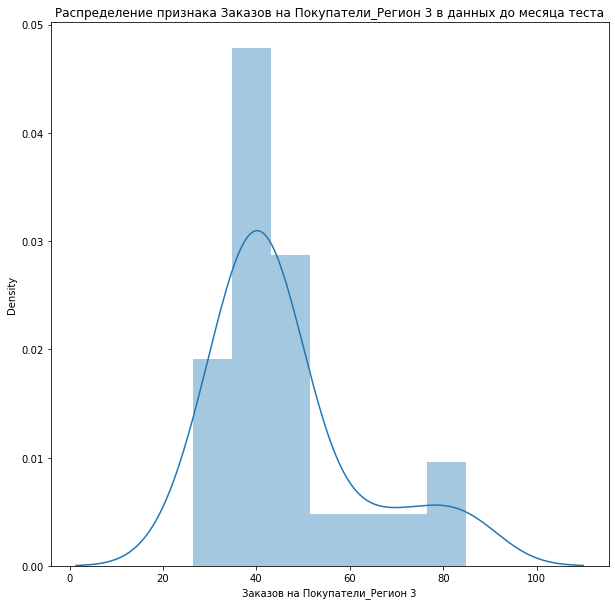

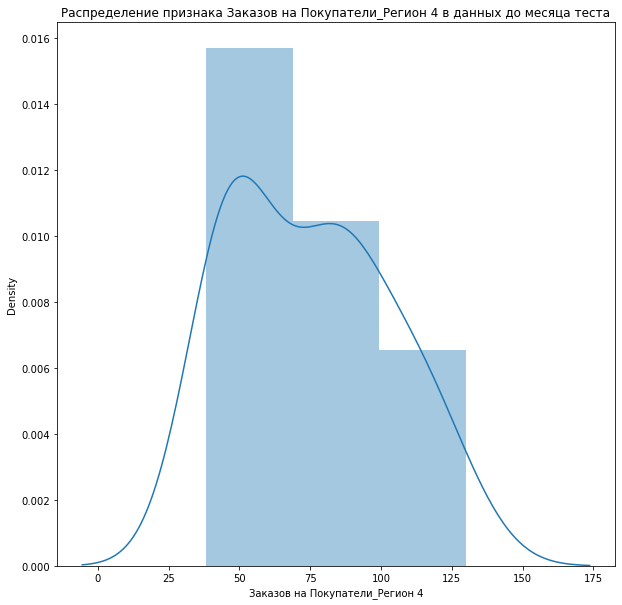

In [29]:
warnings.filterwarnings('ignore')
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в данных до месяца теста')
    sns.distplot(data2[col])

In [30]:
 for col in num_cols:    
        mean = np.mean(data2[col])
        std = round(np.std(data2[col]),2)
        x_min = min(data2[col])
        x_max = max(data2[col])
        printit ={f'{col}:': {'среднее: 'f'{mean}', 'стандартное отклонение: ' f'{std}', 'min: ' f'{x_min}', 'max: ' f'{x_max}'}}
        pprint.pprint(printit)

{'Количество клиентов_Регион 1:': {'max: 160564',
                                   'min: 82460',
                                   'среднее: 125138.88',
                                   'стандартное отклонение: 21155.1'}}
{'Количество клиентов_Регион 2:': {'max: 405310',
                                   'min: 99659',
                                   'среднее: 229921.2',
                                   'стандартное отклонение: 99041.63'}}
{'Количество клиентов_Регион 3:': {'max: 949497',
                                   'min: 398229',
                                   'среднее: 628141.72',
                                   'стандартное отклонение: 146401.89'}}
{'Количество клиентов_Регион 4:': {'max: 802353',
                                   'min: 164920',
                                   'среднее: 413317.08',
                                   'стандартное отклонение: 169438.23'}}
{'Выручка, тыс. руб._Регион 1:': {'max: 7337199.068965517',
                          

In [31]:
data2.describe()

,Количество клиентов_Регион 1,Количество клиентов_Регион 2,Количество клиентов_Регион 3,Количество клиентов_Регион 4,"Выручка, тыс. руб._Регион 1","Выручка, тыс. руб._Регион 2","Выручка, тыс. руб._Регион 3","Выручка, тыс. руб._Регион 4",Количество заказов_Регион 1,Количество заказов_Регион 2,...,Заказов на Клиента_Регион 3,Заказов на Клиента_Регион 4,Покупатели_Регион 1,Покупатели_Регион 2,Покупатели_Регион 3,Покупатели_Регион 4,Заказов на Покупатели_Регион 1,Заказов на Покупатели_Регион 2,Заказов на Покупатели_Регион 3,Заказов на Покупатели_Регион 4
count,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
mean,125138.880000,229921.200000,628141.720000,413317.080000,7.059532e+06,1.261163e+07,2.895145e+07,1.460134e+07,249954.920000,279895.080000,...,1.766400,5.464000,3063.920000,6565.000000,23907.360000,30249.640000,82.76040,52.978800,46.378800,74.896400
std,21591.330406,101083.935378,149420.800346,172932.174274,2.133300e+05,9.204763e+05,2.369422e+06,5.578302e+05,48358.778025,42172.077943,...,0.606746,1.995783,573.048567,2971.186632,5714.097507,12602.221107,15.14747,26.819366,15.875097,27.746972
min,82460.000000,99659.000000,398229.000000,164920.000000,6.415183e+06,1.114571e+07,2.465858e+07,1.308874e+07,178047.000000,206071.000000,...,0.970000,2.710000,1971.000000,2826.000000,14882.000000,11810.000000,60.33000,20.140000,26.380000,38.230000
25%,110713.000000,141111.000000,522541.000000,281405.000000,6.962541e+06,1.182930e+07,2.697960e+07,1.441422e+07,216324.000000,248964.000000,...,1.370000,3.510000,2695.000000,4016.000000,20498.000000,20076.000000,74.25000,29.870000,36.080000,48.180000
50%,122841.000000,186674.000000,579099.000000,366448.000000,7.080366e+06,1.249638e+07,2.866586e+07,1.469387e+07,234440.000000,278577.000000,...,1.590000,5.730000,2934.000000,5260.000000,22329.000000,26054.000000,81.77000,47.330000,42.610000,80.320000
75%,143468.000000,317191.000000,673691.000000,549520.000000,7.205591e+06,1.335916e+07,3.098360e+07,1.489186e+07,282514.000000,312064.000000,...,1.850000,6.980000,3486.000000,8952.000000,25735.000000,40603.000000,89.00000,75.120000,48.320000,96.340000
max,160564.000000,405310.000000,949497.000000,802353.000000,7.337199e+06,1.424365e+07,3.249361e+07,1.557218e+07,354664.000000,383712.000000,...,3.180000,9.300000,4001.000000,13781.000000,36081.000000,56967.000000,129.49000,104.840000,84.940000,129.940000


### _**Выводы по приведенным выше графикам:**_

<br> Количество клиентов по регионам: в Регионе №1 и №3 распределение этого признака можно отснети к нормальному, но с относительно большим стандартным отклонением. В целом, все показатели, кроме конверсии, можно считать нормально распределенными, но с большим стандартным отклонением.
Конверсия распределяется неравномерно: показатели делятся на 1-2 группы. 

### _**Рассмотрим подробнее регионы по показателям**_

### _**Количество клиентов**_

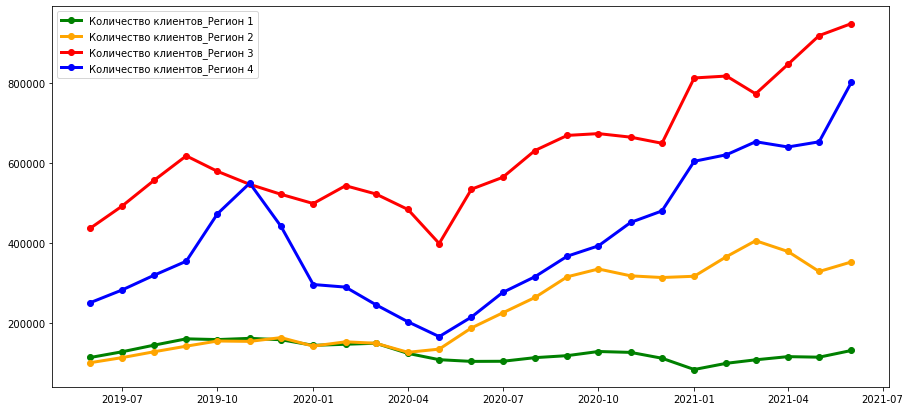

In [32]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'Количество клиентов_Регион 1', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'Количество клиентов_Регион 2', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'Количество клиентов_Регион 3', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'Количество клиентов_Регион 4', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper left')

> **По количеству клиентов ближе к Региону 1 находится Регион 2**

### _**Количество заказов**_

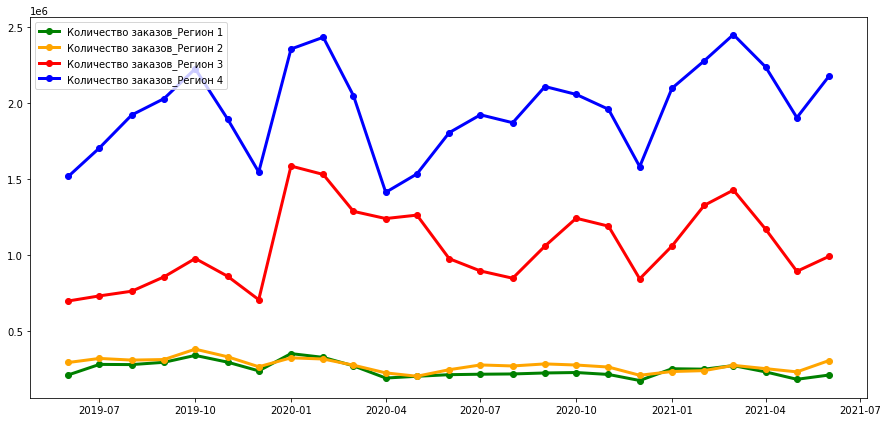

In [33]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'Количество заказов_Регион 1', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'Количество заказов_Регион 2', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'Количество заказов_Регион 3', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'Количество заказов_Регион 4', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper left')

>**По количеству клиентов ближе к Региону 1 находится Регион 2**

### _**Количество заказов на одного клиента**_

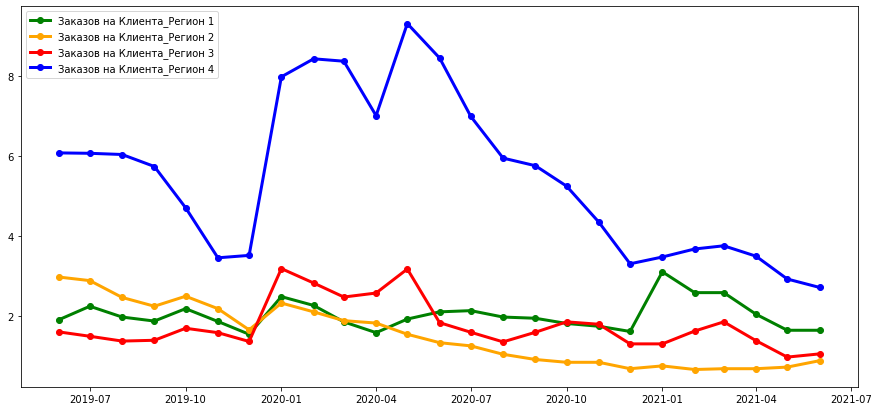

In [34]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'Заказов на Клиента_Регион 1', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'Заказов на Клиента_Регион 2', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'Заказов на Клиента_Регион 3', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'Заказов на Клиента_Регион 4', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper left')

>**Однако при рассмотрении количества клиентов в контексте количества заказов, более схожими будут Регион 1 и 3**

### _**Выручка (тыс.руб/мес.)**_

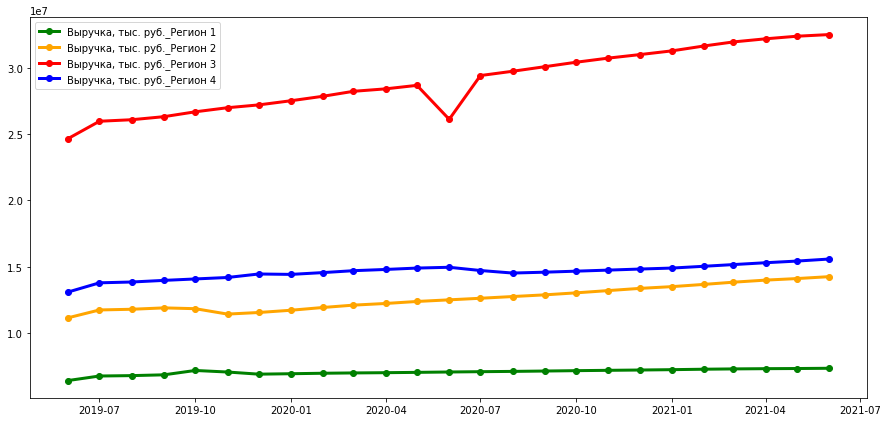

In [35]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'Выручка, тыс. руб._Регион 1', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'Выручка, тыс. руб._Регион 2', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'Выручка, тыс. руб._Регион 3', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'Выручка, тыс. руб._Регион 4', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper left')

> **По этому показателю Регион 1 значительно отстает от остальных трех регионов. В частности Выручка Региона 1 почти на 60% ниже, чем в Регионе 2. 
<br> Но при этом Регион 2 ближе по показателю в Региону 1**

### _**Средний чек  (руб./мес.)**_

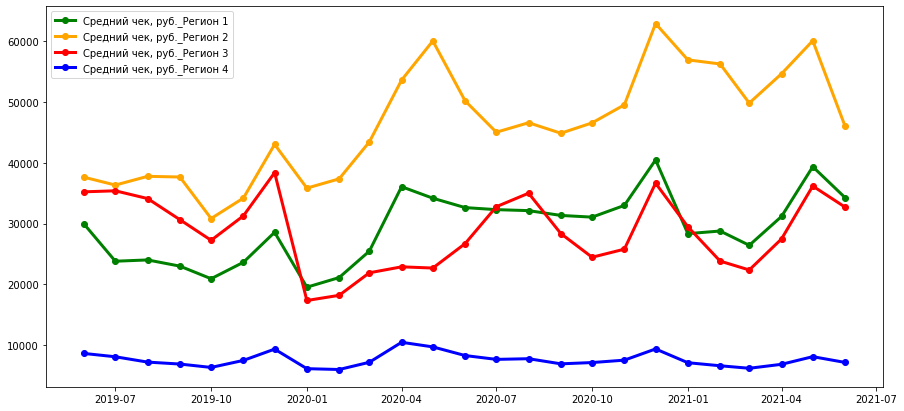

In [36]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'Средний чек, руб._Регион 1', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'Средний чек, руб._Регион 2', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'Средний чек, руб._Регион 3', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'Средний чек, руб._Регион 4', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper left')

>**После рассмотрения представленных гафиков, пришла к выводу, что наиболее значимым показателем при сравнении регионов с целью изменения цен может быть `Средний чек`.
<br> Cредний чек - показатель покупательской способности клиентов по регионам и их отношения к предлагаемым ценам. 
<br> Т.е. сейчас уровни выручки по регионам 1 и 3 отличются почти в 2 раза, но примерно такое же отличие в кол-ве заказов. Т.о. регионы 1 и 3 наиболее близки по средним чекам**


### _**ARPU MAU  (тыс. руб./мес.)**_

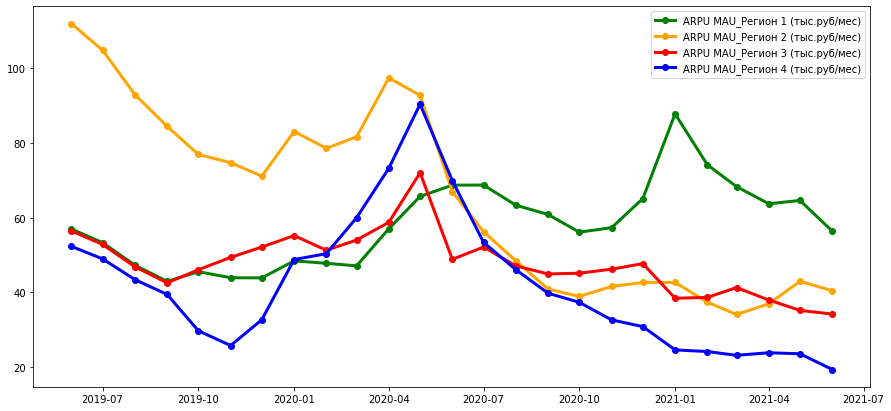

In [37]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'ARPU MAU_Регион 1 (тыс.руб/мес)', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'ARPU MAU_Регион 2 (тыс.руб/мес)', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'ARPU MAU_Регион 3 (тыс.руб/мес)', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'ARPU MAU_Регион 4 (тыс.руб/мес)', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper right')

>**Т.к. ARPU показывает ценность продукта для пользователя, думаю, что на эту метрику также можно полагаться при проверке эластичности спроса по цене.
<br> Если сравнить графики ARPU по четырем регионам, то наиболее близкой будет динамика показателя по Регионам 1 и 3.
<br> При рассмотрении ARPU и среднего чека по заданным периодам (по месяцам), можно сделать вывод, что разброс сумм заказов довольно велик (т.е. большое стандартное отклонение), в результате чего, средний чек за месяц, скорее всего не отражает реальную покупательскую способность клиентов в регионах. Исходя из ARPU она выше, поэтому увеличение цен не должно привести к нижению выручки, но, возможно, приведет к уходу клиентов с низкими чеками, однако в результате увеличит средний чек по оставшимся и новым покупателям.**


### _**ARPPU MAU  (тыс. руб./мес.)**_

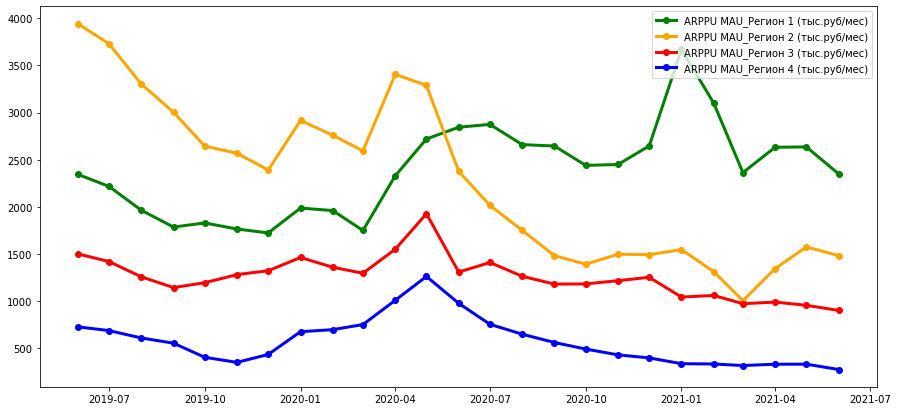

In [35]:
plt.figure(figsize = (15, 7))
plt.plot('date', 'ARPPU MAU_Регион 1 (тыс.руб/мес)', data=data2, marker='o',color='green',linewidth=3)
plt.plot('date', 'ARPPU MAU_Регион 2 (тыс.руб/мес)', data=data2, marker='o',color='orange',linewidth=3)
plt.plot('date', 'ARPPU MAU_Регион 3 (тыс.руб/мес)', data=data2, marker='o',color='red',linewidth=3)
plt.plot('date', 'ARPPU MAU_Регион 4 (тыс.руб/мес)', data=data2, marker='o',color='blue',linewidth=3)
plt.legend(loc='upper right')

>**Если сравнить графики ARPU по четырем регионам, то наиболее близкой будет динамика показателя по Регионам 1 и 3**

<div style="background:lightyellow" markdown =1>
<br>
<p> По итогам анализа склоняюсь к выбору Региона 3 в качестве контрольного при проведении АВ-теста. Для подтверждения проверим еще раз выборки на нормальное распределение и оценим соотносимость данных выбранных регионов.</p>
<br>
</div>

> Дополнительная проверка на нормальное распределение

In [38]:
from scipy.stats import normaltest

In [39]:
norm_cols = []
not_norm = []
for col in num_cols:    
        stat, p = normaltest(np.array(data2[col]))
        #printit = {f'{col}:': {'Statistics: 'f'{stat}', 'P-value: ' f'{p}'}}
        #print(f'{col}:', 'Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            norm_cols.append(col)
        else: 
            not_norm.append(col)
print('Нормальное распределение:', norm_cols, '\n\n', 'не Нормальное распределение:', not_norm)

Нормальное распределение: ['Количество клиентов_Регион 1', 'Количество клиентов_Регион 3', 'Количество клиентов_Регион 4', 'Выручка, тыс. руб._Регион 2', 'Выручка, тыс. руб._Регион 3', 'Выручка, тыс. руб._Регион 4', 'Количество заказов_Регион 1', 'Количество заказов_Регион 2', 'Количество заказов_Регион 3', 'Количество заказов_Регион 4', 'Средний чек, руб._Регион 1', 'Средний чек, руб._Регион 2', 'Средний чек, руб._Регион 3', 'Средний чек, руб._Регион 4', 'ARPU MAU_Регион 1 (тыс.руб/мес)', 'ARPU MAU_Регион 3 (тыс.руб/мес)', 'ARPU MAU_Регион 4 (тыс.руб/мес)', 'ARPPU MAU_Регион 1 (тыс.руб/мес)', 'ARPPU MAU_Регион 2 (тыс.руб/мес)', 'Заказов на Клиента_Регион 2', 'Заказов на Клиента_Регион 4', 'Покупатели_Регион 1', 'Покупатели_Регион 2', 'Покупатели_Регион 3', 'Покупатели_Регион 4', 'Заказов на Покупатели_Регион 2', 'Заказов на Покупатели_Регион 4'] 

 не Нормальное распределение: ['Количество клиентов_Регион 2', 'Выручка, тыс. руб._Регион 1', 'Конверсия в покупку_Регион 1', 'Конверсия в 

>> Как основную метрику для сравнения выбрали Средний чек - он входит в число рядов с нормальным распределением. 

>> Нулевая гипотеза (Н0) = распределение не нормальное; Альтернативная гипотеза (Н1) = распределение нормальное.

>> Сравним на линейную корреляцию между Регионами по Среднему чеку (в данном случае не с т.ч. зависимости др.от друга, но для проверки схожести изменений во времени).

In [41]:
from scipy.stats import pearsonr

In [42]:
# Сравниваем Регионы 1 и 2

data_1 = data2['Средний чек, руб._Регион 1']

data_2 = data2['Средний чек, руб._Регион 2']

stat, p = pearsonr(data_1, data_2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Groups are different (reject H0)')
else:
    print('Groups ARE SIMILAR (fail to reject H0)')

stat=0.809, p=0.000
Groups are different (reject H0)


In [43]:
# Сравниваем Регионы 1 и 3

data_1 = data2['Средний чек, руб._Регион 1']

data_3 = data2['Средний чек, руб._Регион 3']

stat, p = pearsonr(data_1, data_3)

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Groups are different (reject H0)')
else:
    print('Groups ARE SIMILAR (fail to reject H0)')

stat=0.342, p=0.095
Groups ARE SIMILAR (fail to reject H0)


In [44]:
# Сравниваем Регионы 1 и 4

data_1 = data2['Средний чек, руб._Регион 1']

data_4 = data2['Средний чек, руб._Регион 4']

stat, p = pearsonr(data_1, data_4)

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Groups are different (reject H0)')
else:
    print('Groups ARE SIMILAR (fail to reject H0)')

stat=0.634, p=0.001
Groups are different (reject H0)


>> Регионы 1 и 3 схожи по Среднему чеку, можем их сравнивать

### _**ВЫБОР РЕГИОНА ДЛЯ СРАВНЕНИЯ С РЕГИОНОМ 1**_

<br>После рассмотрения представленных гафиков, пришла к выводу, что наиболее значимым показателем при сравнении регионов с целью изменения цен может быть `Средний чек`.
<br> Cредний чек - показатель покупательской способности клиентов (в разрезе 1 покупки) по регионам и их отношения к предлагаемым ценам.
<br> Выручка может зависеть не только от Среднего чека, но и от кол-ва заказов на одного покупателя,  кол-ва покупателей. А соответсвенно, чем больше покупателей, тем больше может быть выручка. Однако это не показатель лояльности к продукту по цене. Такая картина может свидетельствовать о размере населения в Регионе, об информированности о продукте, о наличии конкурентов и цен конкурентов. 
<br> Средний чек, на мой взгляд, точнее отражает картину того, какую сумму в среднем покупатели готовы потратить за одну покупку. Коненчо, в данном случае важно также знать сколько в среднем покупок в месяц приходится на одного платящего клиента, не было ли outofstock по каким-то категориям товаров в Регионе, насколько шировкий ассортимент (т.е. как часто повторяется номенклатура в чеках).
<br>

В целом, при рассмотрении всех 4 Регионов по `Среднему чеку, ARPU` напрашивается разделение на 3 типа по финансовому уровню покупателей:

<br><font color = darkblue> **Регион 1: Средний уровень** </font>
<br>Регион 2:	Верхняя планка среднего уровня (самые благосостоятельные клиенты)
<br><font color = darkblue> **Регион 3:	Средний уровень**</font>
<br>Регион 4:	Ниже среднего уровня

<div class="alert alert-block alert-info">
<b><i><font size = 5>Сезонность</font></i></b>
</div>
<a id="seasonality"></a>


<br> [*Back to content*](#content) 

> **Т.к.изменение цен проводилось в Регионе 1, в этом же регионе будем предсказывать значение Среднего чека для июля 2021 г. - месяц, в котором проводился тест, и по которому нам известны только результаты теста. Предсказанное значение мы будем исполльзовать для того, чтобы оценить не были ли значения по итогам теста результатом влияния сезонности. Т.к. сезонность в продукте есть. Графики сезонности и тренда также рассмотрим ниже** 

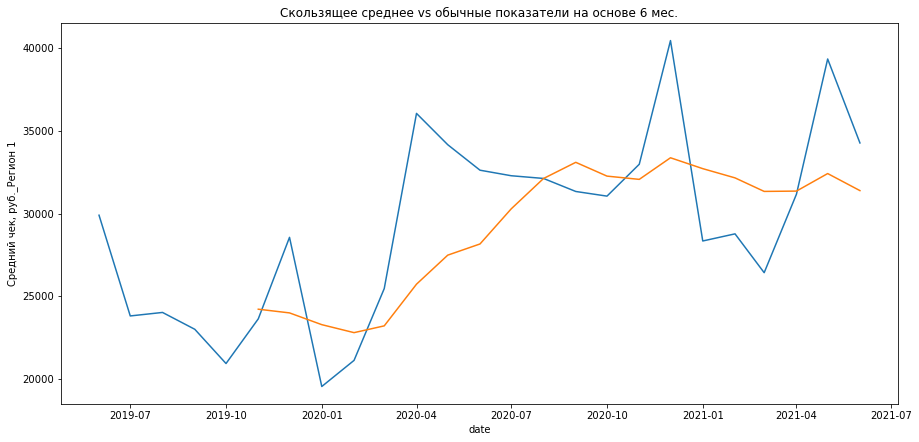

In [45]:
data2['moving_avg_region_1'] = data2['Средний чек, руб._Регион 1'].rolling(6).mean() 
#на основе 6 первых данных считается на 1 шаг вперед и т.к. далее на 1 шаг вперед на основе предыдущих 6-ти. 
# самые первые на графике не отражаются.

plt.figure(figsize = (15, 7))
sns.lineplot(x = data2.date, y = data2['Средний чек, руб._Регион 1'])
sns.lineplot(x = data2.date, y = data2['moving_avg_region_1'])
plt.title('Скользящее среднее vs обычные показатели на основе 6 мес.')
plt.show()

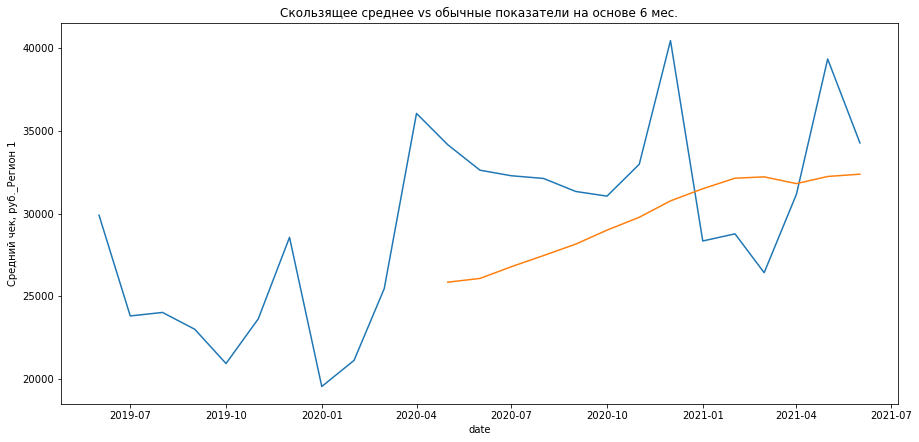

In [46]:
data2['moving_avg_region_1'] = data2['Средний чек, руб._Регион 1'].rolling(12).mean() 
#на основе 6 первых данных считается на 1 шаг вперед и т.к. далее на 1 шаг вперед на основе предыдущих 6-ти. 
# самые первые на графике не отражаются.

plt.figure(figsize = (15, 7))
sns.lineplot(x = data2.date, y = data2['Средний чек, руб._Регион 1'])
sns.lineplot(x = data2.date, y = data2['moving_avg_region_1'])
plt.title('Скользящее среднее vs обычные показатели на основе 6 мес.')
plt.show()

In [47]:
data2['moving_avg_region_1'][10:]

10             NaN
11    25843.910239
12    26070.970082
13    26778.264051
14    27454.297653
15    28149.546798
16    28994.041854
17    29773.887191
18    30766.547415
19    31500.701409
20    32138.979334
21    32219.205062
22    31811.478208
23    32243.872679
24    32381.347006
Name: moving_avg_region_1, dtype: float64

In [48]:
data2['Средний чек, руб._Регион 1'][10:]

10    36061.013497
11    34166.899214
12    32622.992363
13    32287.683418
14    32124.091479
15    31335.099602
16    31053.477558
17    32982.694036
18    40470.165091
19    28338.240054
20    28769.393787
21    26418.710643
22    31168.291247
23    39355.632874
24    34272.684281
Name: Средний чек, руб._Регион 1, dtype: float64

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data2['Средний чек, руб._Регион 1'], period = 12) 
# Берем годовой период, просто кол-во месяцев, т.к. данные по месяцам

decomposed.seasonal

0     1905.840704
1      707.124650
2     -142.683249
3    -1290.926953
4    -1408.798433
5      508.084236
6     4932.244387
7    -7343.159292
8    -6453.156520
9    -2792.854678
10    7042.284814
11    4336.000335
12    1905.840704
13     707.124650
14    -142.683249
15   -1290.926953
16   -1408.798433
17     508.084236
18    4932.244387
19   -7343.159292
20   -6453.156520
21   -2792.854678
22    7042.284814
23    4336.000335
24    1905.840704
Name: seasonal, dtype: float64

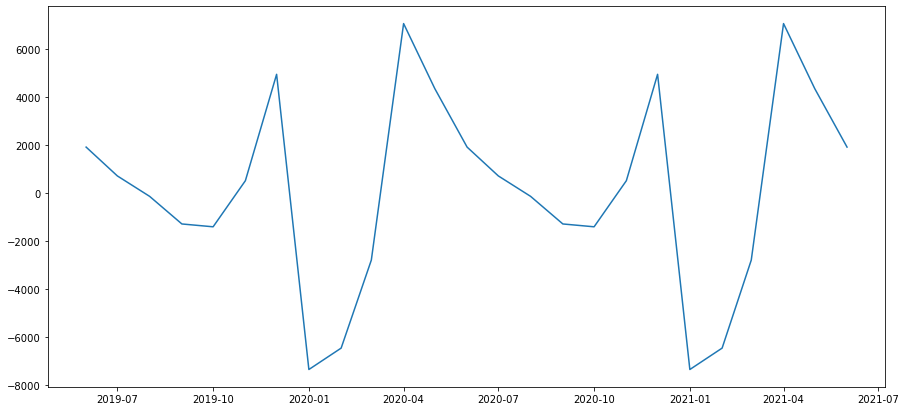

In [50]:
plt.figure(figsize=(15, 7))
plt.plot(data2.date, decomposed.seasonal)

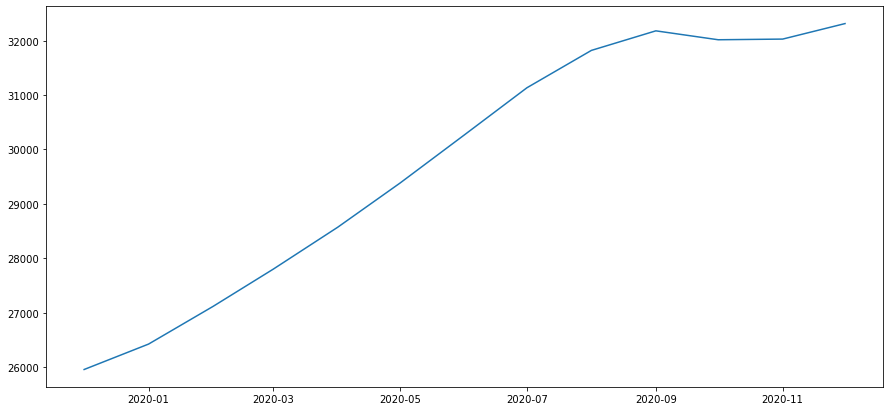

In [51]:
plt.figure(figsize=(15, 7))
plt.plot(data2.date, decomposed.trend)

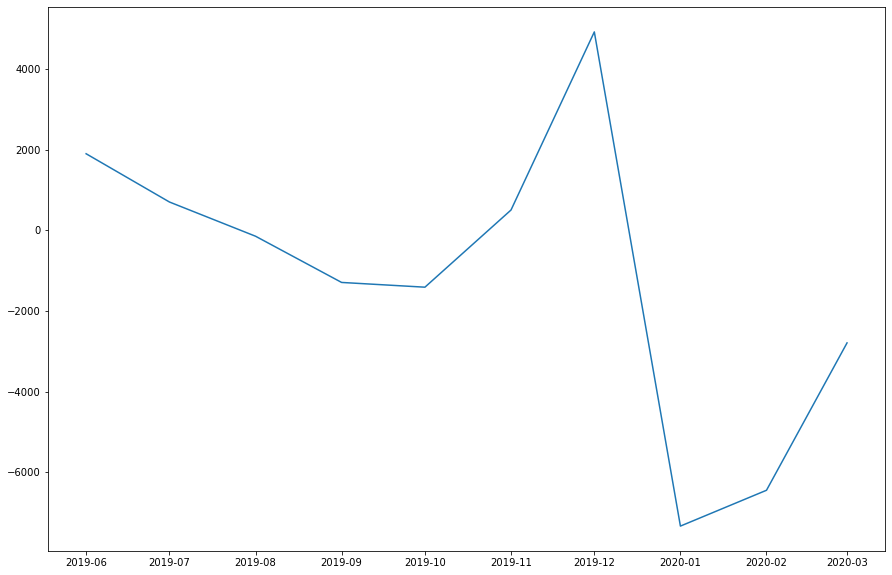

In [52]:
plt.figure(figsize=(15, 10))
plt.plot(data2.date[:10], decomposed.seasonal[:10])
#посмотрим первые 20 наблюдений

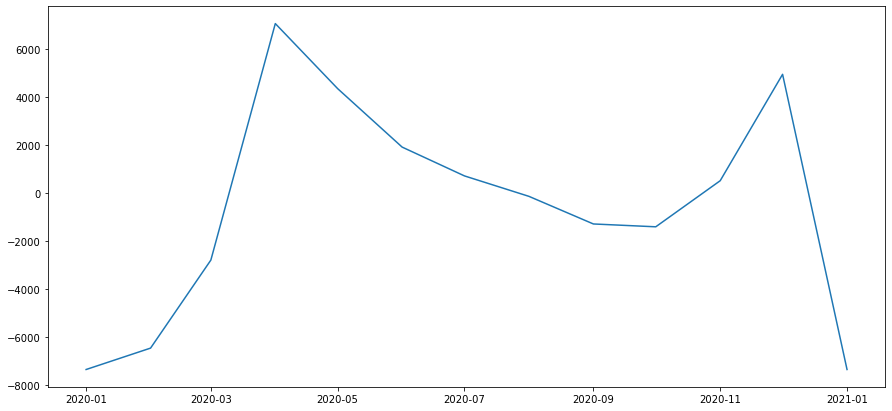

In [53]:
plt.figure(figsize=(15, 7))
plt.plot(data2.date[7:20],decomposed.seasonal[7:20])
#посмотрим первые 20 наблюдений

>**Есть ярко выраженная сезонность - резкий и значительный спад в январе каждого года. При этом наблюдается снижение Среднего чека в середине года (но не такое сильное, как в январе). 
<br> Могу предположить, что продукт родается по годовой подписке, возможно, она у основной массы покупателей начинается в начале года и истекает в конце года. Примером, на мой взгляд, могут быть подписки на бухгалтерские программы с отдельной платой за дополнительные лицензии на сотруника покупателя в рамках одной подписки (основная масса компаний закрывает фин.год в конце марта иkb в конце декабря). 
<br> Или это помесячная подписка на такие продукты, как сервисы по поиску работы (работа.ру, hh): есть колебания в середине года, но т.к. такие сервисы работают на все отрасли, наложение сезонности разных отраслей в какой-то степени нейтрализуют друг друга и это может сгладить общее снижение спроса; в январе же, как правило, активность в поисках новой работы и ее в предложении сильно снижаются.**

<div class="alert alert-block alert-info">
<b><i><font size = 5>АВ-тест</font></i></b>
</div>
<a id="abtest"></a>


<br> [*Back to content*](#content)

**Принцип отбора территории для теста**	

Насколько я поняла,  мы выбираем 2 региона, в 1 из них повышаем цены (на весь регион), проводим сравнение целиком на этих регионах, без выборки клиентов внутри регионов. Т.о. это тест на групповой выборке (cluster sample).                                                                                                                                                         <br> Вторым регионом для оценки результатов теста был выбран Регион 3 в виду бОльшей схожести с Регионом 1 по Среднему чеку, ARPU. Графики ARPPPU также больше соответствуют по Ркгионам 1 и 3. Кроме этого, Регион 3 больше соотносится с Регионом 1 по количеству заказов на Клиента.  Т.о. основной принцип выбора -  наибольшая схожесть по экономической составляющей, по среднему чеку и динамике ARPU.                                                                                                                                                                                   
<br> **Описание АВ-теста**

<br> 1. `Чистота проведения теста`	не проводить других активностей, которые могут прямо или косвенно влиять на результаты теста.	
<br> 2. `Гипотезы:`
<br> Нулевая гипотеза:	Изменение цены не изменит размер выбранных метрик. Т.е. все останется, как было: результаты контрольной и тестовой версии не будут статзначимо отличаться	
<br> Альтернативная гипотеза:	Изменение цены приведет к увеличению Выручки, Среднего чека, ARPU. Версии А и В будут отличаться статзначимо.	

<br> 3. `Ключевые метрики  теста`
<br>1) Средний чек (метрика среднего) - главная метрика теста
<br>2) Выручка	(метрика среднего)
<br>3) ARPU	(метрика среднего)
<br>4) Количество клиентов	(метрика среднего)

<br> 4. `Время начала теста (с учетом сезонности)`	Желательно не проводить тесты во время праздничных дней, исключительно в будни или исключительно в выходные дни, и т.п. Данные таких тестов будет практически невозможно экстраполировать. Также не стоит проводить тесты во время внесезонного спада или быстрого сезонного роста, т.к. итоги теста могут оказаться результатом влияния внешних факторов, а не тестируемых изменений в продукте.

<br> 5. `Определение размера выборки`	Размер выборки нужен для верности проведения теста, для того, чтобы предотвратить слишком раннее или слишком позднее звершение АВ-теста. А также для того, чтобы оценить возможность его проведения с определенными входными параметрами: например, для маленьких компаний может не хватить аудитории, особенно, если планируется тест не с 2 версиями, а с 3 и более. 	

<br> 6. `Принцип определения продолжительности теста:`	После определения размера выборки можно посчитать продолжительность проведения теста. Продолжительность будет зависеть от того, сколько пользователей в сутки посещают сайт (приложение) и совершают целевое действие (влияют на метрику) по которой проводится тест. Т.е. если для теста выборка должна включать по 1000 пользователей для каждой версии (контрольной и тестовой), а в сутки в продукт заходят по 100 пользователей, то тест должен идти не менее 10 дней. При этом нужно учесть, что в 10 дней попадает один weekend, и для верности можно увеличить тест до 14 дней, чтобы картина по целевым событиям в выходные дни была лучше подкреплена данными. Если по какой-то причине в одну из версий за период теста пришло меньше пользователей, чем было расчитано для выборки, то стоит рассмотреть продление теста или его перезапуск.

<br> 7. `Picking problem`	Исключить проблему подглядывания: не делать окончательных выводов о результатах до полного завершения теста, не выключать тест до истечения изначально назначенного срока, и не удлинять его без веских причин.	

<br> 8. `Перед запуском АВ-теста` 	Еще раз перед запуском АВ-теста проверить, что все нужные изменения  в тестовую версию внесены, они работают, тестовая версия также работает. 

<br>9. `Во время теста`	Периодически проверять как работает продукт в тестовой  и  контрольной группах: сайт не зависает, у обеих групп есть доступ в интернет (например, сбой в работе оператора в регионе), т.д. 	

<br> 10. `Подвести итоги` 	Выбранные метрики теста - метрики о среднем. Поэтому для подведения итогов теста нужно расcчитать показатели: Стандартная ошибка (SE), Степень свободы, t-критерий Стьюдента, p-value. При p-value < 0.05 Нулевая гипотеза отверагается, вероятность допустить ошибку 1-го рода мала, принимается Альтернативная гипотеза. При p-value > 0.05 Нулевая гипотеза верна, Альтернативная отвергается.

<br> 11. `Проверка верности результатов теста`	Если есть сомнения в том, что все нужные данные попали в тест, можно посмотреть какие пользователи фактически видели тестовую версию: сколько b2b, b2c клиентов, клиенты с каким по стоимости пакетом услуг (товарами) прошли тест, т.д.	

| Подсчет итогов теста| Подсчет итогов теста | Подсчет итогов теста | 
| --- | --- | --- |
| Группы | A (контрольный, без изменения цен) | B (тестовый, с изменением цен) |
| Регионы | Регион 3| Регион 1|
| Размер выборки | Размер выборки можно посчитать с учетом прогнозируемого (ожидаемого) изменения метрик при помощи калькулятора для метрик среднего: https://statulator.com/SampleSize/ss2M.html 
| Длительность проведения теста | На тест по условиям задачи отвели 1 месяц|
| Размер выборки для подсчетов итогов теста (N)| Взяла кол-во заказов, т.к. нет информации о том, какие именно клиенты приведены - все имеющиеся в базе, все, кто заходил на сайт, или все, кто доходил до этапа покупки |
| Метрика | Средний чек | Средний чек |
| Уровень доверия | 95% | 95% |
| Ссылка на проверку p-value | https://www.socscistatistics.com/pvalues/tdistribution.aspx |





**Сделаем необходимые расчеты**

In [197]:
data_y = df[['Месяц теста', 'Показатели', 'Регионы']]

In [198]:
data_y

,Месяц теста,Показатели,Регионы
0,132986.0,Количество клиентов,Регион 1
1,365987.0,Количество клиентов,Регион 2
2,989765.0,Количество клиентов,Регион 3
3,835498.0,Количество клиентов,Регион 4
4,8765098.0,"Выручка, тыс. руб.",Регион 1
5,14098609.0,"Выручка, тыс. руб.",Регион 2
6,33987785.0,"Выручка, тыс. руб.",Регион 3
7,16095287.0,"Выручка, тыс. руб.",Регион 4
8,234098.0,Количество заказов,Регион 1
9,324867.0,Количество заказов,Регион 2


In [199]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Месяц теста  20 non-null     float64
 1   Показатели   20 non-null     object 
 2   Регионы      20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


In [77]:
# стандартное отклонение по каждой из выборок (не включая месяц теста)
std_1 = round(np.std(data2['Средний чек, руб._Регион 1']),2)
std_2 = round(np.std(data2['Средний чек, руб._Регион 3']),2)

# средний чек по каждой из выборок (на месяц теста)
mean_1 = data_y[(data_y['Регионы']=='Регион 1') & (data_y['Показатели']=='Средний чек, руб.')]['Месяц теста'].sum()
mean_2 = data_y[(data_y['Регионы']=='Регион 3') & (data_y['Показатели']=='Средний чек, руб.')]['Месяц теста'].sum()

# число участников эксперимента в каждой выборке (т.к. средний чек изначально посчитат от Количества Клиентов, 
# то берем этот показатель)
N_1 = data_y[(data_y['Регионы']=='Регион 1') & (data_y['Показатели']=='Количество клиентов')]['Месяц теста'].sum()
N_2 = data_y[(data_y['Регионы']=='Регион 3') & (data_y['Показатели']=='Количество клиентов')]['Месяц теста'].sum()
            

In [216]:
# стандартная ошибка
se = round(np.sqrt((std_1**2/N_1) + (std_2**2/N_2)),2)
se

16.24

In [218]:
# степень свободы
df = N_1+N_2-2
df

1122749.0

In [222]:
# t-значение (t-критерий Стьюдента)
t_st = (mean_1-mean_2)/se
t_st

35.582412568875036

**P-value** меньше 0.05, т.е. результаты теста значимы и версии статзначимо отличаются. Т.е. Нулевая гипотеза неверна.
ссылка на рассчет p-value: https://www.socscistatistics.com/pvalues/tdistribution.aspx

Или можем проверить p-value следующим способом:

In [235]:
tset, pval = ttest_1samp(data2['Средний чек, руб._Регион 1'], mean_1)
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 1.6278049268146664e-07
we are rejecting null hypothesis


### _**Выводы по результатам АВ-теста:**_

<br> 

Нулева гипотеза оказалась неверна. Т.е. верна альтернативная. 
<br>Альтернативная гипотеза: изменение цены приведет к увеличению Выручки, Среднего чека, ARPU. Версии А и В будут отличаться статзначимо.